<hr style='border:2px solid #460073'> </hr>
<h1 style='color: #460073'>Исследование поведения аудитории: 2. </h1> 
<hr style='border:2px solid #460073'> </hr>
<h3 style='color: #460073'>Автор: </h3> 

* Бессонов Евгений  
* [Адрес в телеграмм](https://t.me/EMskv "t.me/EMskv")  
* [Портфолио с JupiterNotebook проекта](https://github.com/evgeniy-yandex/Data_Science "github")
    
<hr style='border:2px solid #460073'> </hr>
<h1 style='color: #460073'>Описание проекта. </h1> 
<hr style='border:2px solid #460073'> </hr>
<h3 style='color: #460073'>Описание данных. </h3> 

Для работы получены файл `Daily_Attention.xlsx`

Предоставленные массивы данных об отдельных аудиториях диджитал-ресурсов среди населения России в возрасте 12 лет и старше в динамике за 3 месяца. Содержаться как общие показатели среди населения, так и в разбивке на возрастные группы и устройство контакта - Web Desktop (ПК и ноутбуки), App Mobile (Мобильное приложение), Web Mobile (Мобильный браузер).
Все файлы содержат идентичный набор ресурсов за один и тот же период.

<h3 style='color: #460073'>Описание метрик в файлах: </h3> 

`ADATT` - **Average Daily Attention**  
Средняя доля проведенного на медиа объекте времени от общего времени пребывания в интернете за день.


<h3 style='color: #460073'>Задача на проект 2. </h3> 

Провести анализ EDA данных из файла `Daily_Attention` с метрикой `ADATT`:  
1. Описать, какие основные тренды видите.
2. Какие особенности в структуре и поведении аудитории ресурсов?
3. Какие причины изменений показателей динамики для конкретного ресурса?

<h3 style='color: #460073'>План работы. </h3> 

1. Импорт библиотек.
2. Загрузка файлов с данными `Daily_Duration`
3. Изучение датасетов и проведение первичной обработки данных.
    * Размеры датасетов.
    * Сущность признаков.
    * Типы данных.
    * Наличие/отсутствие дубликатов.
    * Наличие/отсутствие пропусков данных.
4. Проведение EDA анализа. 
    * Приведение к формату 'datetime' данных со значениями времени.
    * Проведение для выбранных источников информации по каждой из шести возрастных групп 'до 12 лет', 'от 12 до 24 лет', 'от 24 до 34 лет','от 34 до 44 лет','от 44 до 54 лет','от 55 лет' следующий анализ:
        * Графическое представление `Average Daily Attention`.
        * Анализ на наличие трендов и сезонности `Average Daily Attention`.
        * Оценка стационарности временного ряда. Тест Дики-Фуллера (Dickey-Fuller test).
    * (`примечание`. Для суммарных, по всем возрастных категорий пользователей анализ проводить не будем. Проведем сравнение по возрастным группам).
5. Оформление итоговых выводов.        

<hr style='border:2px solid #460073'> </hr>
<h1 style='color: #460073'>1. Импорт библиотек. </h1> 
<hr style='border:2px solid #460073'> </hr>

In [1]:
# Все import соберем в начале проекта:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import seaborn as sns
import re

from skimpy import skim, clean_columns
from datetime import datetime
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta

# Размер окна для проверки стационарности временного ряда
WINDOW_STATIONARITY = 7

# Настроим вид таблиц:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50) 

<hr style='border:2px solid #460073'> </hr>
<h1 style='color: #460073'>2. Загрузка файлов с данными.</h1> 
<hr style='border:2px solid #460073'> </hr>

Изучил файл `Daily_Attention.xlsx` и привёл его к формату `csv`:

In [2]:
# Вспомогательная функция для чтения файлов с данными
def load_dataset(file_name, separator):
    '''
    Функция для проверки нахождения файла и загрузки датафрейма.
    '''
    if os.path.exists(file_name):
        data = pd.read_csv(file_name, sep = separator)
        print('Dataset "', file_name, '" is loaded successfully.', sep='')
        return data
    else:
        print('Something with', file_name, 'is wrong!')

In [3]:
# Загрузка данных по фактическому включению/выключению пиплметра         
df_da_full = load_dataset('Daily_Attention_total.csv', ';')

Dataset "Daily_Attention_total.csv" is loaded successfully.


<hr style='border:2px solid #460073'> </hr>
<h1 style='color: #460073'>3. Изучение датасета и проведение первичной обработки данных.</h1> 
<hr style='border:2px solid #460073'> </hr>

Создаю вспомогательную функцию для изучения датафреймов.

In [4]:
def view_skim_df(df):
    '''
    Функция для единообразного изучения датафреймов.
    1. Контроль размера датафрейма.
    2. Вывод основных данных по датафрейму.
    3. Распечатка на экране первых трёх объектов датафрейма.
    '''
    skim(df)
    display(df.head(3))
    print('Количество дубликатов:', df.duplicated().sum())    
    print('Полное количество пропущенных значений по всем признакам:', 
          df.isnull().sum().sum())
    
    return

Рассмотрим данные, содержащиеся в датафрейме.

In [5]:
# Изучим содержимое датафрейма:
view_skim_df(df_da_full)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 516    │ │ float64     │ 75    │                                                          │
│ │ Number of columns │ 77     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name               ┃ NA   ┃ NA %   ┃ mean      ┃ sd       ┃ p0    ┃ p25   ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ 2gis Web Desktop          │    0 │      0 │     0.077 │    0.057 │     0 │  0.04 │    0.1 │  0.73 │   █▁   │  │
│ │ 2gis App Mobile           │    0 │      0 │      0.16 │    0.065 │  0.05 │  0.12 │   0.21 │  0.38 │ ▅▇█▃▂  │  │
│ │ 2gis Web Mobile           │    0 │      0 │     0.045 │    0.026 │  0.01 │  0.03 │   0.05 │  0.31 │   █▂   │  │
│ │ Discord Web Desktop       │    0 │      0 │     0.059 │    0.059 │     0 │  0.02 │   0.08 │  0.42 │  █▃▁   │  │
│ │ Discord App Mobile        │    0 │      0 │      0.18 │     0.18 │  0.01 │  0.06 │    0.2 │  0.82 │ █▃ ▁▁  │  │
│ │ Discord Web Mobile        │    2 │   0.39 │    0.0044 │   0.0099 │     0 │     0 │   0.01 │  0.13 │   █    │  │
│ │ Facebook Web Desktop      │   16 │    3.1 │     0.099 │     0.11 │     0 │  0.01 │   0.13 │  0.46 │ █▄▁▁▁▁ │  │
│ │ Facebook App Mobile       │    0 │      0 │     0.035 │    0.027 │     0 │  0.01 │   0.05 │  0.12 │ █▆▇▄▂▁ │  │
│ │ Facebook Web Mobile       │    0 │      0 │     0.019 │    0.025 │     0 │  0.01 │   0.02 │  0.47 │   █    │  │
│ │ Google Карты Web Des      │    0 │      0 │     0.068 │    0.042 │  0.01 │  0.04 │   0.09 │   0.3 │  █▇▂   │  │
│ │ Google Карты App Mob      │    0 │      0 │     0.083 │    0.032 │  0.03 │  0.06 │    0.1 │  0.23 │  ▆█▄▂  │  │
│ │ Google Карты Web Mob      │    3 │   0.58 │    0.0057 │    0.027 │     0 │     0 │   0.01 │  0.56 │   █    │  │
│ │ Google Новости Web D      │  270 │     52 │   8.1e-05 │   0.0009 │     0 │     0 │      0 │  0.01 │   █    │  │
│ │ Google Новости App M      │    8 │    1.6 │   0.00055 │   0.0024 │     0 │     0 │      0 │  0.02 │   █    │  │
│ │ Google Новости Web M      │  310 │     61 │   9.9e-05 │   0.0014 │     0 │     0 │      0 │  0.02 │   █    │  │
│ │ Kp Web Desktop            │    0 │      0 │     0.036 │    0.035 │     0 │  0.01 │   0.05 │  0.28 │   █▃   │  │
│ │ Kp App Mobile             │  270 │     52 │         0 │        0 │     0 │     0 │      0 │     0 │     █  │  │
│ │ Kp Web Mobile             │    0 │      0 │     0.064 │    0.048 │  0.01 │  0.04 │   0.08 │  0.56 │   █▁   │  │
│ │ Mail.ru Новости Web       │    0 │      0 │      0.24 │     0.17 │     0 │   0.1 │   0.35 │  0.84 │ ██▆▂▁  │  │
│ │ Mail.ru Новости App       │    8 │    1.6 │    0.0069 │   0.0074 │     0 │     0 │   0.01 │  0.03 │ █ █ ▂  │  │
│ │ Mail.ru Новости Web       │    0 │      0 │     0.027 │    0.023 │     0 │  0.01 │   0.04 │  0.18 │  █▆▁   │  │
│ │ OK Web Desktop            │    0 │      0 │       4.

Date  2gis Web Desktop  2gis App Mobile  2gis Web Mobile  \
0  01.04.2023              0.04             0.17             0.04   
1  02.04.2023              0.03             0.14             0.04   
2  03.04.2023              0.09             0.12             0.05   

   Discord Web Desktop  Discord App Mobile  Discord Web Mobile  \
0                 0.12                0.20                0.01   
1                 0.12                0.21                0.00   
2                 0.03                0.17                0.01   

   Facebook Web Desktop  Facebook App Mobile  Facebook Web Mobile  \
0                  0.10                 0.03                 0.02   
1                  0.14                 0.03                 0.02   
2                  0.14                 0.03                 0.01   

   Google Карты Web Desktop  Google Карты App Mobile  Google Карты Web Mobile  \
0                      0.05                     0.08                     0.01   
1                      0.04                     0.06                     0.00   
2                      0.12                     0.06                     0.00   

   Google Новости Web Desktop  Google Новости App Mobile  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   Google Новости Web Mobile  Kp Web Desktop  Kp App Mobile  Kp Web Mobile  \
0                        0.0            0.03            0.0           0.04   
1                        0.0            0.03            0.0           0.04   
2                        0.0            0.04            0.0           0.05   

   Mail.ru Новости Web Desktop  Mail.ru Новости App Mobile  \
0                         0.17                        0.01   
1                         0.18                        0.00   
2                         0.36                        0.00   

   Mail.ru Новости Web Mobile  OK Web Desktop  OK App Mobile  OK Web Mobile  \
0                        0.01            6.16            1.9           0.59   
1                        0.01            5.82            2.0           0.61   
2                        0.03            5.55            1.8           0.50   

   ...  Wildberries Web Desktop  Wildberries App Mobile  \
0  ...                     1.01                    1.01   
1  ...                     0.97                    0.98   
2  ...                     0.82                    0.97   

   Wildberries Web Mobile  Youtube Web Desktop  Youtube App Mobile  \
0                    0.44                26.30               15.83   
1                    0.51                25.36               16.39   
2                    0.46                19.33               14.34   

   Youtube Web Mobile  ВКонтакте Web Desktop  ВКонтакте App Mobile  \
0                3.62                  10.00                  7.87   
1                2.91                   9.87                  8.23   
2                2.85                   9.55                  8.20   

   ВКонтакте Web Mobile  Дзен Web Desktop  Дзен App Mobile  Дзен Web Mobile  \
0                  1.63              5.39             0.27             9.58   
1                  1.30              5.25             0.25            10.35   
2                  1.38              5.48             0.26             9.17   

   Лента: Lenta Web Desktop  Лента: Lenta App Mobile  Лента: Lenta Web Mobile  \
0                      0.02                     0.01                     0.02   
1                      0.03                     0.01                     0.02   
2                      0.01                     0.01                     0.01   

   Яндекс.Картинки Web Desktop  Яндекс.Картинки App Mobile  \
0                         0.54                         NaN   
1                         0.73                         NaN   
2                         0.68                         NaN   

   Яндекс.Картинки Web Mobile  Яндекс.Карты Web Desktop

Количество дубликатов: 0
Полное количество пропущенных значений по всем признакам: 3667


Сформируем список признаков:
* **В связи с большим количеством источников информации об аудитории диджитал-ресурсов среди населения России и с связи с демонстрационой целью данной работы, ограничимся ТРЕМЯ**. 
* Выберем для работы следующие 3 источника: **'Tiktok', 'Whatsapp', 'Youtube'**. Остальные признаки удалим. 
* Выбор сделал по наиболее интересным источникам, с данными без пропусков, так как располагаю всего 86 записями по каждой возрастной группе.

Для удобства работы упакуем имена признаков к словарь.

In [6]:
list_of_keys = ['Tiktok', 'Whatsapp', 'Youtube']
dict_columns = {}

list_columns = df_da_full.columns[1:-1]# Убрали Date и age
for num in range(0, len(list_columns), 3):
    key_dict = list_columns[num].split()[0]
    if key_dict in list_of_keys:
        list_3col = []
        for i in range(3):
            list_3col.append(" ".join(list_columns[num+i].split()[1:]))
        dict_columns[key_dict] = list_3col
        
dict_columns        

{'Tiktok': ['Web Desktop', 'App Mobile', 'Web Mobile'],
 'Whatsapp': ['Web Desktop', 'App Mobile', 'Web Mobile'],
 'Youtube': ['Web Desktop', 'App Mobile', 'Web Mobile']}

In [7]:
list_features = []
list_features.append('Date')
for key, val in dict_columns.items():
    for v in val:
        list_features.append(key+' '+v)
list_features.append('age')
df_da = df_da_full[list_features]
df_da.head(3)

Date  Tiktok Web Desktop  Tiktok App Mobile  Tiktok Web Mobile  \
0  01.04.2023                0.02               8.71               0.20   
1  02.04.2023                0.04               8.38               0.22   
2  03.04.2023                0.01               7.68               0.23   

   Whatsapp Web Desktop  Whatsapp App Mobile  Whatsapp Web Mobile  \
0                  0.24                 9.08                 0.01   
1                  0.17                 8.40                 0.01   
2                  0.27                10.11                 0.01   

   Youtube Web Desktop  Youtube App Mobile  Youtube Web Mobile  age  
0                26.30               15.83                3.62    0  
1                25.36               16.39                2.91    0  
2                19.33               14.34                2.85    0

**Отмечаем**:
* Количество записей 516.
* Количество признаков равно 77. Из них только `Date` имеет тип string. Следует перевести в datetime.
* Все данные разбиты на возрастные группы:
    * до 12 лет,
    * 12 - 24 года,
    * 25 - 34 года, 
    * 35 - 44 года,
    * 45 - 54 года,
    * от 55 и старше.
* Дубликатов нет. Видимо, даты расставлены аккуратно.
* Пропуски данных есть у 21 признака.
* ML проводить не нужно (согласно задания требуется только EDA анализ), поэтому название столбцов не будем приводить к типу *snake_case*. Оставим их такими, как они и есть.
* В связи с большим количеством источников информации об аудитории диджитал-ресурсов среди населения России и с связи с демонстрационой целью данной работы, **ограничился ТРЕМЯ ресурсами**. Остальные признаки удалил.

<hr style='border:2px solid #460073'> </hr>
<h1 style='color: #460073'>4. EDA анализ.</h1> 
<hr style='border:2px solid #460073'> </hr>

## 4.1. Приведение к формату 'datetime' признака `Date`.

Преобразуем даты из формата 'string' в формат 'datetime'

In [8]:
df_da['Date'] = pd.to_datetime(df_da.Date, format='%d.%m.%Y')
df_da.info()
print('Для проведения исследования данные собраны в период с',
    df_da.Date.min(), 'по ', df_da.Date.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  516 non-null    datetime64[ns]
 1   Tiktok Web Desktop    516 non-null    float64       
 2   Tiktok App Mobile     516 non-null    float64       
 3   Tiktok Web Mobile     516 non-null    float64       
 4   Whatsapp Web Desktop  516 non-null    float64       
 5   Whatsapp App Mobile   516 non-null    float64       
 6   Whatsapp Web Mobile   516 non-null    float64       
 7   Youtube Web Desktop   516 non-null    float64       
 8   Youtube App Mobile    516 non-null    float64       
 9   Youtube Web Mobile    516 non-null    float64       
 10  age                   516 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 44.5 KB
Для проведения исследования данные собраны в период с 2023-04-01 00:00:

## 4.2. Отсортируем данные в хронологическом порядке.

In [9]:
df_da = df_da.sort_values(by=['Date', 'age'])
df_da.head(7)

Date  Tiktok Web Desktop  Tiktok App Mobile  Tiktok Web Mobile  \
0   2023-04-01                0.02               8.71               0.20   
86  2023-04-01                0.03              15.56               0.14   
172 2023-04-01                0.01               7.56               0.14   
258 2023-04-01                0.02               6.71               0.11   
344 2023-04-01                0.00               6.43               0.19   
430 2023-04-01                0.02               5.07               0.41   
1   2023-04-02                0.04               8.38               0.22   

     Whatsapp Web Desktop  Whatsapp App Mobile  Whatsapp Web Mobile  \
0                    0.24                 9.08                 0.01   
86                   0.14                 4.70                 0.00   
172                  0.46                 9.38                 0.02   
258                  0.13                10.35                 0.02   
344                  0.27                10.03                 0.01   
430                  0.23                12.24                 0.01   
1                    0.17                 8.40                 0.01   

     Youtube Web Desktop  Youtube App Mobile  Youtube Web Mobile  age  
0                  26.30               15.83                3.62    0  
86                 34.77               17.30                2.07   12  
172                35.48               15.15                2.24   25  
258                29.37               13.70                3.06   35  
344                19.79               14.25                2.53   45  
430                16.94               18.22                7.66   55  
1                  25.36               16.39                2.91    0

## 4.3. Анализ Average Daily Attention по возрастной категории 'до 12 лет'.

In [10]:
print("Размер полного датафрейма:", df_da.shape)

Размер полного датафрейма: (516, 11)


In [11]:
df_da_0 = df_da[df_da.age == 0]
if (df_da.shape[0] / 6 == df_da_0.shape[0]):
    print("Выделение части датафрейма проведено корректно.")
else:
    print("Произошла потеря данных!")
    
print("Размер датафрейма по возрастной категории 'до 12 лет':", 
      df_da_0.shape)
df_da_0.head(3)

Выделение части датафрейма проведено корректно.
Размер датафрейма по возрастной категории 'до 12 лет': (86, 11)


Date  Tiktok Web Desktop  Tiktok App Mobile  Tiktok Web Mobile  \
0 2023-04-01                0.02               8.71               0.20   
1 2023-04-02                0.04               8.38               0.22   
2 2023-04-03                0.01               7.68               0.23   

   Whatsapp Web Desktop  Whatsapp App Mobile  Whatsapp Web Mobile  \
0                  0.24                 9.08                 0.01   
1                  0.17                 8.40                 0.01   
2                  0.27                10.11                 0.01   

   Youtube Web Desktop  Youtube App Mobile  Youtube Web Mobile  age  
0                26.30               15.83                3.62    0  
1                25.36               16.39                2.91    0  
2                19.33               14.34                2.85    0

In [12]:
# Сформируем список рабочих признаков
list_features = list_features[1:-1]# Убрали Date и age
list_features

['Tiktok Web Desktop',
 'Tiktok App Mobile',
 'Tiktok Web Mobile',
 'Whatsapp Web Desktop',
 'Whatsapp App Mobile',
 'Whatsapp Web Mobile',
 'Youtube Web Desktop',
 'Youtube App Mobile',
 'Youtube Web Mobile']

### 4.3.1. Графическое представление `Average Daily Attention` по возрастной  категории 'до 12 лет'.

Создам вспомогательные функции.

In [13]:
def plot1_average_daily_duration(df, source, fig):
    '''
    Функция вывода на экран единичного графика.
    '''
    plt.plot(df['Date'], df[list_features[source]], 
             label=list_features[source])
    plt.xticks(fontsize = 8, rotation=45, color = 'blue')
    plt.ylabel('Average Daily Attention',
              fontsize = 8, color = 'blue') 
    plt.title(list_features[source], color = 'red')

    
def plot3_average_daily_duration(df, source):
    '''
    Функция вывода в 1 ряд трёх графиков 'Average Daily Attention'
    от одного источника.
    '''
    fg = plt.figure(figsize=(9, 3), constrained_layout=True)
    gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fg)
    
    for num in range(3): 
        fig = fg.add_subplot(gs[0, num])
        plot1_average_daily_duration(df, source+num, fig)
    
    plt.show()  

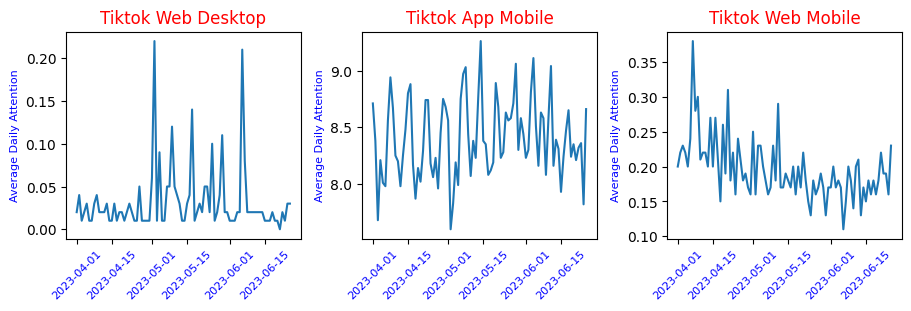

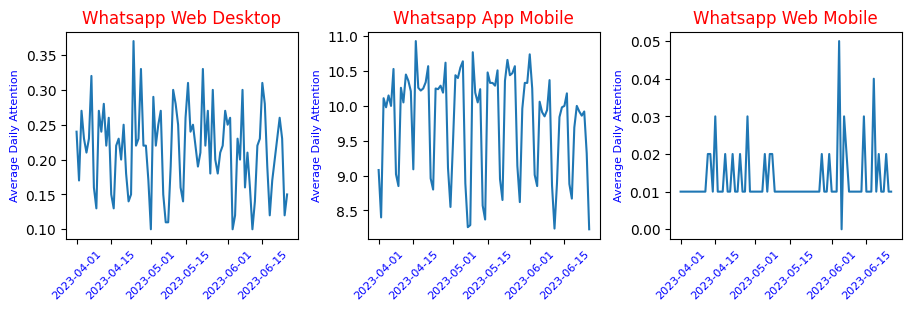

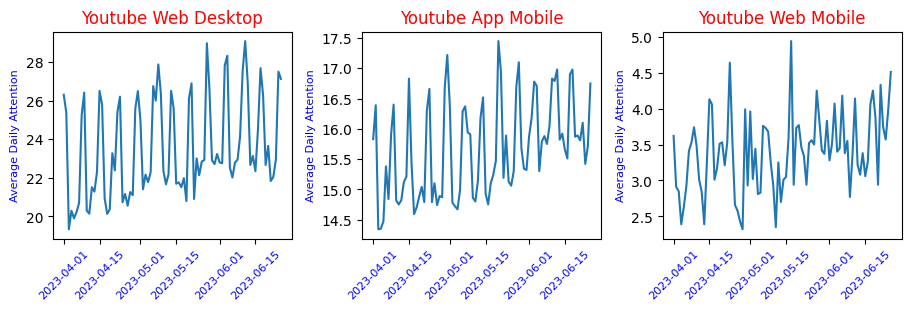

In [14]:
for source in range(0, len(list_features), 3):
    plot3_average_daily_duration(df_da_0, source)  

**Отмечаем**:
* возможны тенденции для следующих источников:
    * *Youtube Web Desktop*,
    * *Youtube App Mobile*.
* для остальных источников визуально определить тренды невозможно;
* вероятны циклические повторения;
* дети до 12 лет редко пользуются 'Whatsapp Web Mobile'.

### 4.3.2. Анализ на наличие трендов и сезонности `Average Daily Duration` по возрастной категории 'до 12 лет'.

Делаем вспомогательные функции.

In [15]:
def graph_trend_seasonality(num, list_columns, decomp):
    '''
    Функция графического представления тренда и сезонности.
    '''
    fg = plt.figure(figsize=(9, 3), constrained_layout=True)
    gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)

    fig_ax_1 = fg.add_subplot(gs[0, 0])
    decomp.trend.plot(ax=plt.gca())
    plt.title(list_columns[num]+' - ТРЕНД', color = 'red')
    plt.ylabel('Значение тренда.', color = 'blue')
    plt.legend()

    fig_ax_2 = fg.add_subplot(gs[0, 1])
    decomp.seasonal.plot(ax=plt.gca())
    plt.title(list_columns[num]+' - ПЕРИОД.', color = 'red')
    plt.ylabel('Значение периодическое.', color = 'blue')
    plt.legend()

    plt.show()
    

def trend_seasonality(df, list_columns):
    '''
    Функция расчёта тренда и сезонности временного ряда.
    '''
    for num in tqdm(range(len(list_columns))):
        # Создадим датафрейм и выберем для него 
        # признак 'Date' и один информационнный.       
        for_decompose = df[['Date', list_columns[num]]]
        for_decompose.index = for_decompose['Date']
        for_decompose = for_decompose.drop('Date', axis=1)
        for_decompose.sort_index(inplace=True)
        for_decompose = for_decompose.resample('1D').sum()
        decomp = seasonal_decompose(for_decompose)  
        
        graph_trend_seasonality(num, list_columns, decomp)
    
    return decomp

  0%|          | 0/9 [00:00<?, ?it/s]

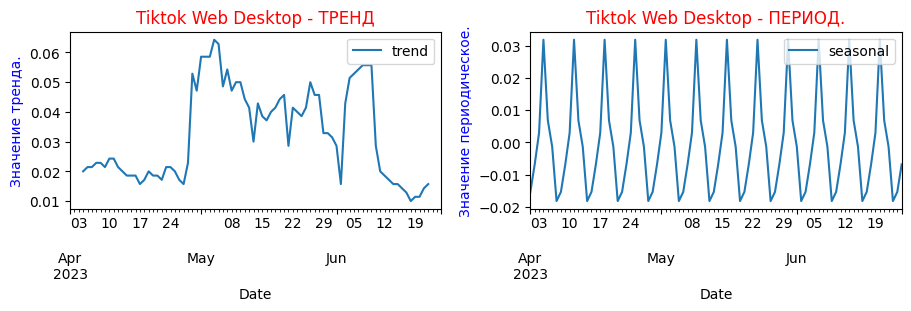

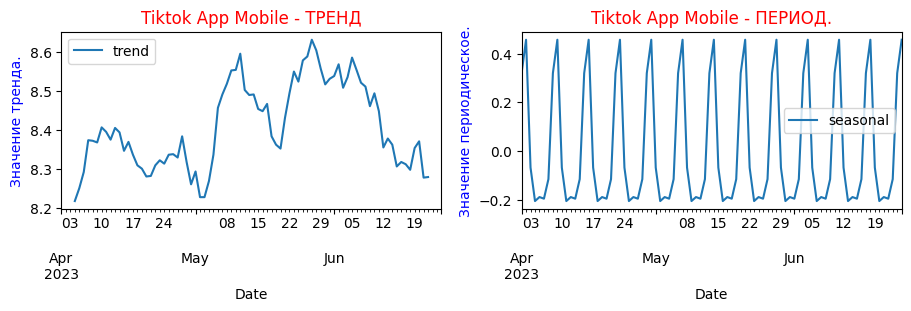

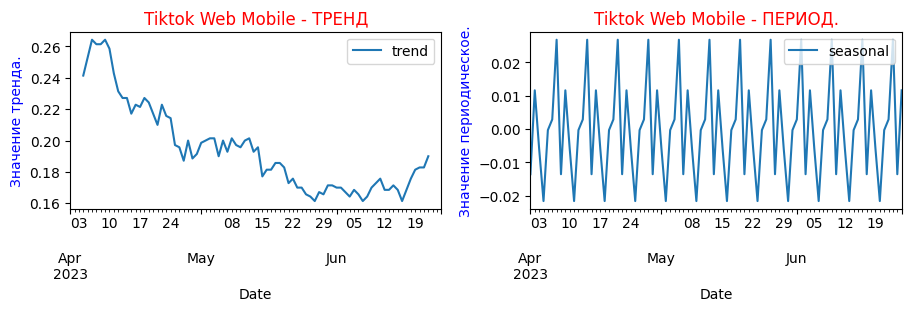

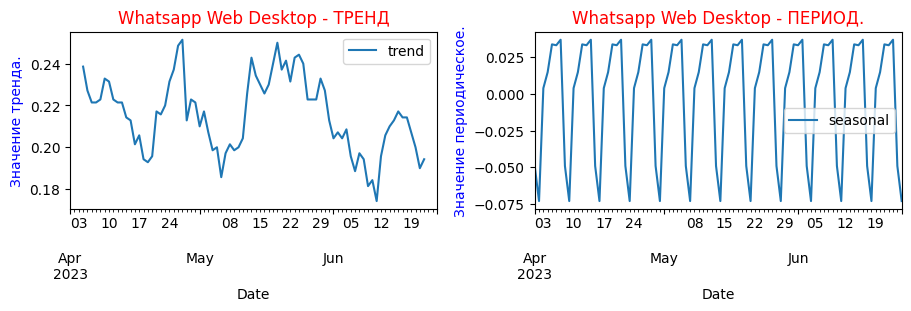

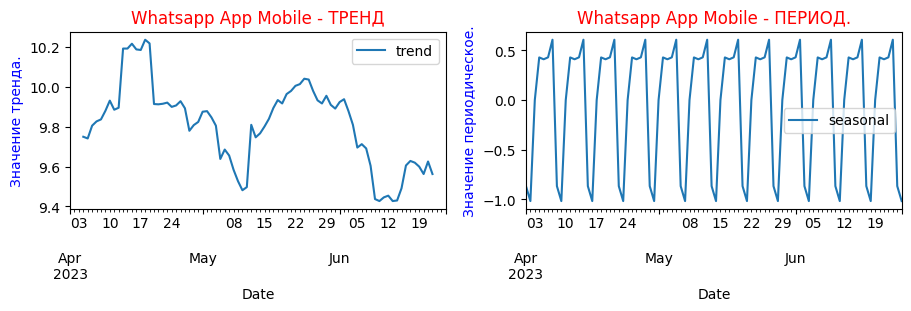

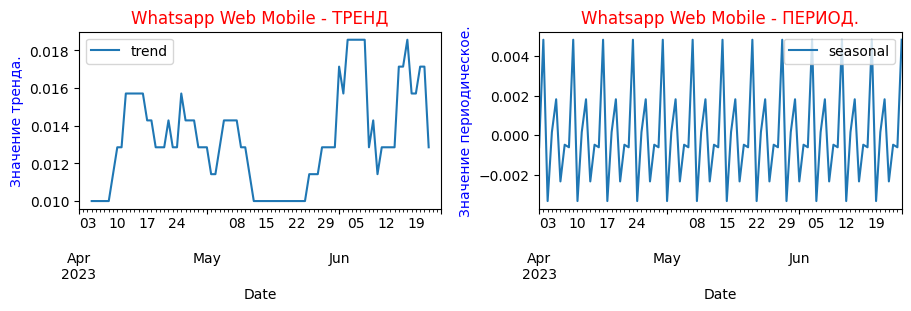

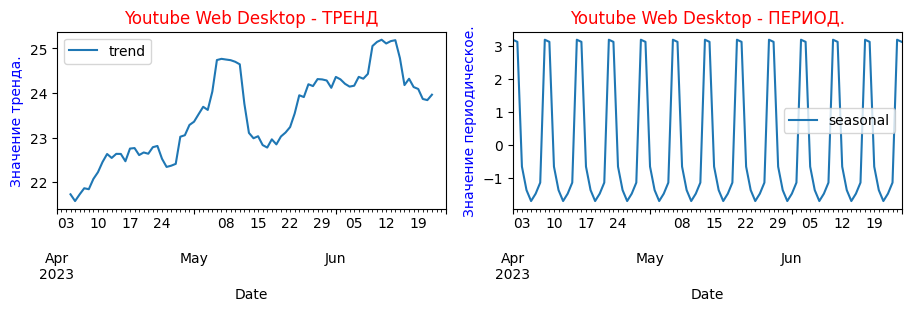

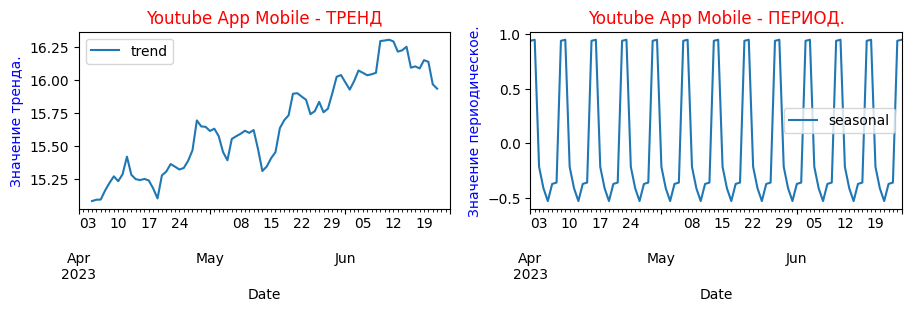

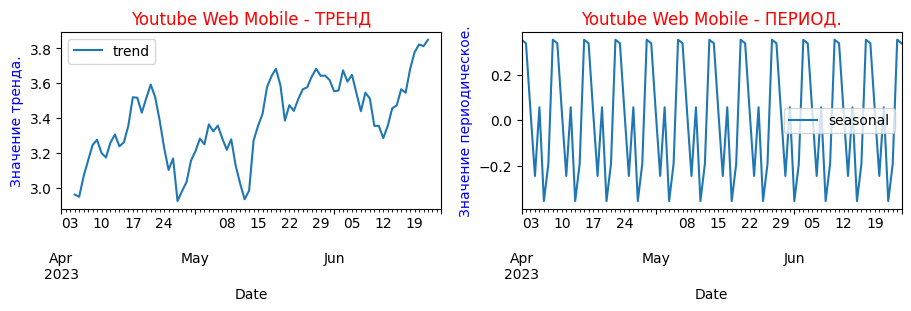

In [16]:
trend_seasonality(df_da_0, list_features)

**Отмечаем**, для возрастной группы 'до 12 лет':
* Возможные отрицательный тренд для *Tiktok Web mobile* и положительные для *Yuotube Web Desktop* и *Yuotube App Mobile*.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.

**Изучим сезонную (периодическую) составляющую за неделю.**

In [17]:
# Проверим правильность выбранного источника информации.
print(list_features)

['Tiktok Web Desktop', 'Tiktok App Mobile', 'Tiktok Web Mobile', 'Whatsapp Web Desktop', 'Whatsapp App Mobile', 'Whatsapp Web Mobile', 'Youtube Web Desktop', 'Youtube App Mobile', 'Youtube Web Mobile']


Введём вспомогательные функции.

In [18]:
def calc_print_weekday(date_start, date_stop):
    '''
    Функция нахождения названий дней недели.
    '''
    date_tmp = datetime.strptime(date_start, '%Y-%m-%d')
    date_end = datetime.strptime(date_stop, '%Y-%m-%d')
    labels = []

    while date_tmp <= date_end: 
        labels.append(str(date_tmp.strftime('%y-%m-%d')) + \
                      ' - ' + date_tmp.strftime('%a'))
        date_tmp = date_tmp + timedelta(days=1)

    print('Дни недели:')
    n = 0
    for lab in labels:
        if n < 3:
            print(lab, 10*' ', end='')
            n = n +1
        else:
            print(lab, end='\n')
            n = 0
            
           
def one_season(df, fg, gs, features, num, gr):
    '''
    Функция расчёта и отображения графика периодичности (сезонности).
    '''

    # Создадим датафрейм и выберем для него 
    # признак 'Date' и один информационнный.
    for_decompose = df[['Date', features[num+gr]]]
    for_decompose.index = for_decompose['Date']
    for_decompose = for_decompose.drop('Date', axis=1)
    for_decompose.sort_index(inplace=True)
    for_decompose = for_decompose.resample('1D').sum()
    decomp = seasonal_decompose(for_decompose)

    fig = fg.add_subplot(gs[0, gr])
    decomp.seasonal[date_start:date_stop].plot(ax=plt.gca())
    plt.title(features[num+gr]+' - ПЕРИОД', size = 10, color = 'red')
    plt.xticks(fontsize = 8, rotation=0, color = 'blue')
    plt.ylabel('Значение тренда.', color = 'blue'); 

            
def all_seasonal(df, features):
    '''
    Функция построения графиков периодичности (сезонности).
    '''
    for num in tqdm(range(0, len(features), 3)):
        fg = plt.figure(figsize=(12, 3), constrained_layout=True)
        gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fg)

        one_season(df, fg, gs, features, num, 0)
        one_season(df, fg, gs, features, num, 1)
        one_season(df, fg, gs, features, num, 2)
    
        plt.tight_layout() 
    

Дни недели:
23-04-01 - Sat           23-04-02 - Sun           23-04-03 - Mon           23-04-04 - Tue
23-04-05 - Wed           23-04-06 - Thu           23-04-07 - Fri           23-04-08 - Sat
23-04-09 - Sun           23-04-10 - Mon           23-04-11 - Tue           23-04-12 - Wed
23-04-13 - Thu           23-04-14 - Fri           23-04-15 - Sat           23-04-16 - Sun


  0%|          | 0/3 [00:00<?, ?it/s]

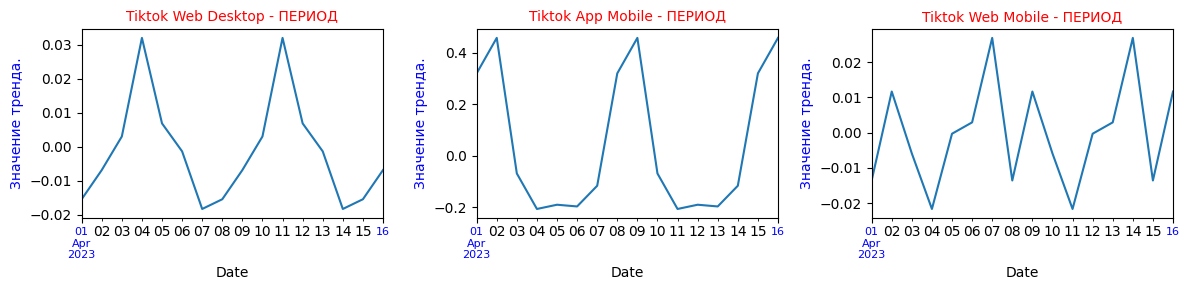

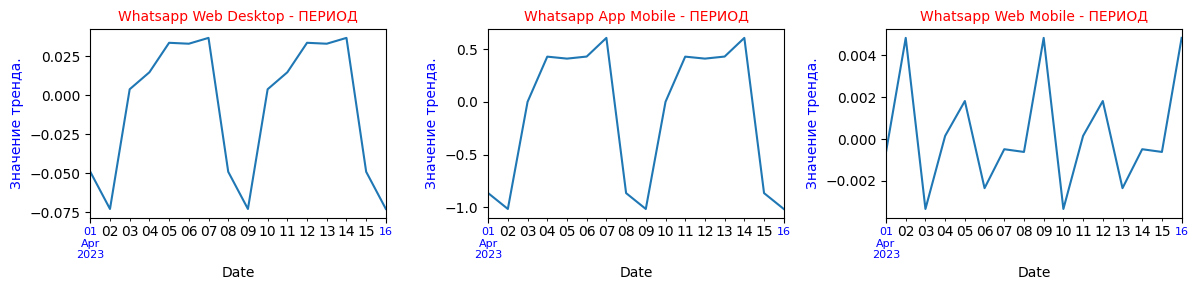

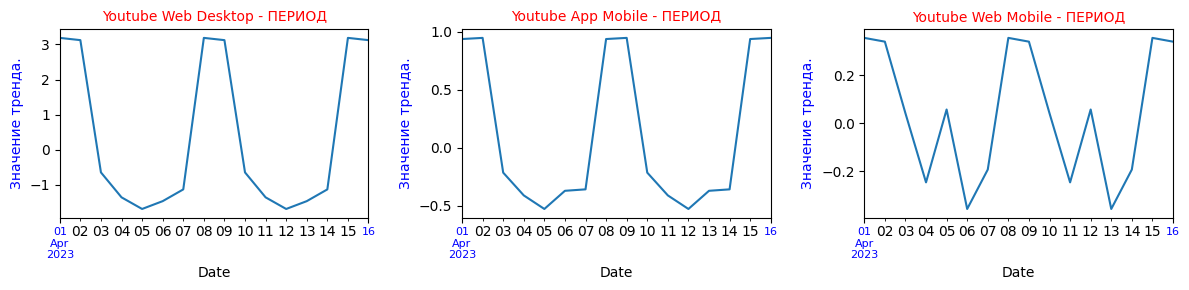

In [19]:
date_start, date_stop = '2023-04-01', '2023-04-16'

calc_print_weekday(date_start, date_stop) 
all_seasonal(df_da_0, list_features)

**Отмечаем**:
* Для всех источников наблюдается периодичность величиной - 1 неделя.
* Для трех источников информации ('Tiktok Web Desktop', 'Whatsapp Web Desktop', 'Whatsapp App Mobile') можно говорить о том, что проведенное на медиа объекте пользователями возрастной группы 'до 12 лет' уменьшается в выходные и резко возрастает в рабочие дни.
* Ещё для трех источников информации ('Tiktok App Mobile', 'Youtube Web Desktop', 'Youtube App Mobile') наблюдаем противоположную картину, с максимумами в выходные дни и минимумами в рабочие дни.

**Оценка стационарности временного ряда.**

Временной ряд называется `стационарным`, если он не имеет тренда. Говоря более точно, среднее значение и дисперсия не меняются со смещением во времени.

Оценку стационарности проведём 2 способами:
* `визуально`,
* применив тест `Дики-Фуллера`.

Создадим вспомогательный функции

In [20]:
def visual_stationarity_1(df, fg, gs, features, num, pos):
    '''
    Функция построения 'скользящего среднего' единичного графика.
    '''
    # Зададим временный датафрейм c признаком для рассчитываемых 
    # тестовых значений скользящего среднего:
    df_tmp = df[['Date', features[num+pos], 'age']].copy()
    df_tmp = df_tmp.sort_values(by=['Date', 'age'])
    df_tmp = df_tmp.groupby(['Date']).sum()[[features[num+pos]]]
    df_tmp['mean'] = (df_tmp[features[num+pos]].
                      rolling(window = WINDOW_STATIONARITY).
                      mean() )

    fig_ax_1 = fg.add_subplot(gs[0, 0+pos])
    plt.plot(df_tmp[features[num+pos]], 
         label = 'Ср. доля времени в интернет', color = 'steelblue')
    plt.plot(df_tmp['mean'], 
         label = 'Скользящее среднее за неделю', color = 'orange')

    plt.legend(title = 'Графики:', loc = 'upper left')        
    plt.xticks(fontsize = 8, rotation=15)
    plt.ylabel('Доля времени в интернет', color = 'blue')
    plt.title(features[num+pos], color = 'red')

    
def visual_stationarity_full(df, features):
    '''
    Функция построения 'скользящего среднего'.
    '''    
    for num in tqdm(range(0, len(features), 3)):
        fg = plt.figure(figsize=(12, 3), constrained_layout=True)
        gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fg)

        visual_stationarity_1(df, fg, gs, features, num, 0)
        visual_stationarity_1(df, fg, gs, features, num, 1)
        visual_stationarity_1(df, fg, gs, features, num, 2)
    
        plt.tight_layout() 

  0%|          | 0/3 [00:00<?, ?it/s]

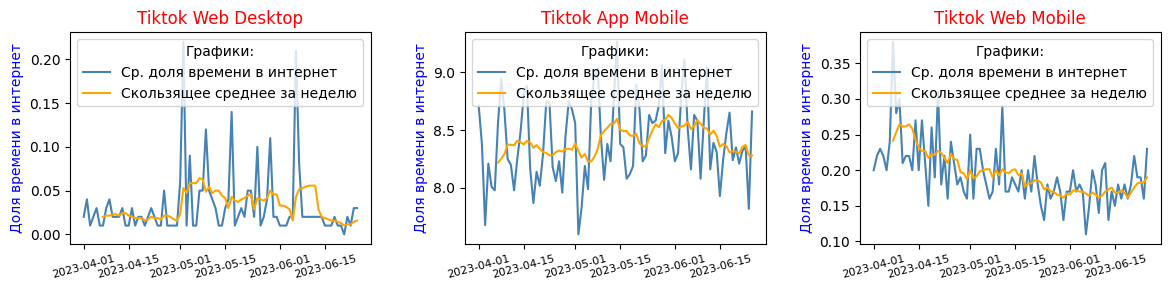

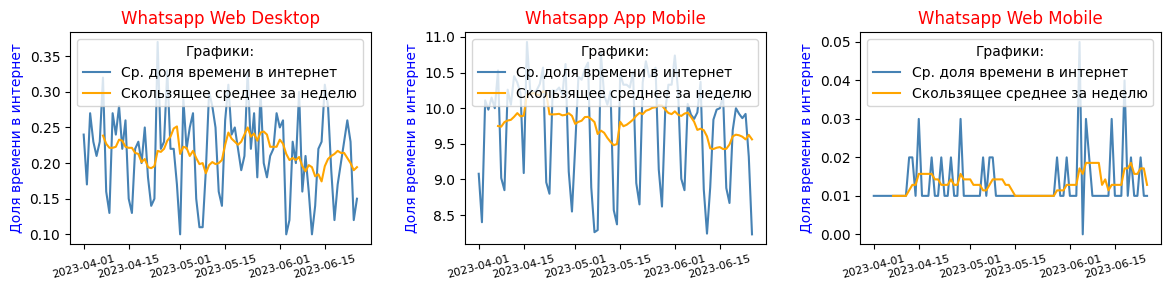

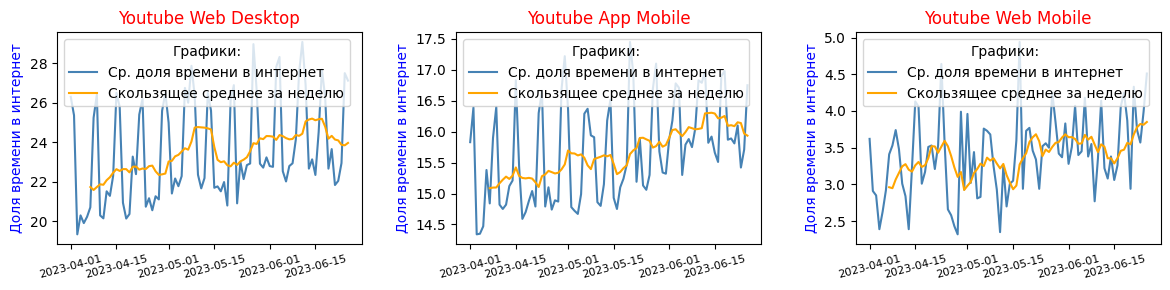

In [21]:
visual_stationarity_full(df_da_0, list_features)

**Отмечаем** возможные тренды:
* для *Tiktok Web Mobile* на убывание;
* для всех источников *Youtube* на возрастание.

**Тест `Дики-Фуллера` (Dickey-Fuller test)**.

Тест заключается в том, что нужно выполнить статистическую проверку следующей гипотезы:
* Нулевая гипотеза H0 предполагает, что процесс нестационарный.
* Альтернативная гипотеза H1, соответственно говорит об обратном. 

Используем пороговое значение, равное 0.05 (5%).

In [22]:
# Настроим, чтобы числа в датасетах отражались с 3 знаками после запятой
pd.set_option('display.float_format', '{:.3f}'.format) 

df_test_DF = pd.DataFrame(columns=[
    'source', 'ADF criterion', 'P-value', 'Critical value 1%',
    'Critical values 5%', 'Conclusion'])


def test_DF(df, columns):
    '''
    Функция проведения теста 'Дики-Фуллера' для проверки стационарности.
    '''
    for col in columns:
        # Передадим функции 'adfuller' данные по изучаемому признаку и
        # сохраним результат в переменной adf_test:
        adf_test = adfuller(df[col].fillna(0))
        if adf_test[0] < adf_test[4]["5%"]:
            df_test_DF.loc[len(df_test_DF.index )] =(
                [col, adf_test[0], adf_test[1], adf_test[4]["1%"],
                 adf_test[4]["5%"], "Стационарен."])
        else:
            df_test_DF.loc[len(df_test_DF.index )] =(
                [col, adf_test[0], adf_test[1], adf_test[4]["1%"],
                 adf_test[4]["5%"],"НЕ стационарен!"])
# adf_test[4]["10%"] - если интересно

In [23]:
# Запуск исполнения теста
test_DF(df_da_0, list_features)

# Просмотр датафрейма с результатами
display(df_test_DF) 

# Удалим ненужный более датафрейм
del df_test_DF

source  ADF criterion  P-value  Critical value 1%  \
0    Tiktok Web Desktop         -8.119    0.000             -3.510   
1     Tiktok App Mobile         -2.318    0.166             -3.516   
2     Tiktok Web Mobile         -3.039    0.031             -3.519   
3  Whatsapp Web Desktop         -6.971    0.000             -3.513   
4   Whatsapp App Mobile         -1.537    0.515             -3.516   
5   Whatsapp Web Mobile        -11.488    0.000             -3.510   
6   Youtube Web Desktop         -1.945    0.311             -3.516   
7    Youtube App Mobile         -1.648    0.458             -3.516   
8    Youtube Web Mobile         -6.548    0.000             -3.510   

   Critical values 5%       Conclusion  
0              -2.896     Стационарен.  
1              -2.899  НЕ стационарен!  
2              -2.900     Стационарен.  
3              -2.897     Стационарен.  
4              -2.899  НЕ стационарен!  
5              -2.896     Стационарен.  
6              -2.899  НЕ стационарен!  
7              -2.899  НЕ стационарен!  
8              -2.896     Стационарен.

**Промежуточные выводы** для возрастной группы 'до 12 лет':
* Дети до 12 лет редко пользуются 'Whatsapp Web Mobile'.  
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.
* Тест Дики-Фуллера не опровергает гипотезу о нестационарности временного ряда(наличии устойчивого тренда) для следующих источников:
    * 'Tiktok App Mobile',
    * 'Whatsapp App Mobile',
    * 'Youtube Web Desktop',
    * 'Youtube App Mobile'.    

In [24]:
# Удалим более ненужный датафрейм.
del df_da_0

## 4.4. Анализ Average Daily Attention по возрастной категории 'от 12 до 24 лет'.

In [25]:
print("Размер полного датафрейма:", df_da.shape)

Размер полного датафрейма: (516, 11)


In [26]:
df_da_12 = df_da[df_da.age == 12]
if (df_da.shape[0] / 6 == df_da_12.shape[0]):
    print("Выделение части датафрейма проведено корректно.")
else:
    print("Произошла потеря данных!")
    
print("Размер датафрейма по возрастной категории 'от 12 до 24 лет':", 
      df_da_12.shape)
df_da_12.head(3)

Выделение части датафрейма проведено корректно.
Размер датафрейма по возрастной категории 'от 12 до 24 лет': (86, 11)


Date  Tiktok Web Desktop  Tiktok App Mobile  Tiktok Web Mobile  \
86 2023-04-01               0.030             15.560              0.140   
87 2023-04-02               0.010             14.990              0.110   
88 2023-04-03               0.020             14.040              0.150   

    Whatsapp Web Desktop  Whatsapp App Mobile  Whatsapp Web Mobile  \
86                 0.140                4.700                0.000   
87                 0.050                4.740                0.010   
88                 0.040                5.540                0.010   

    Youtube Web Desktop  Youtube App Mobile  Youtube Web Mobile  age  
86               34.770              17.300               2.070   12  
87               34.260              18.680               2.160   12  
88               31.100              15.560               2.260   12

### 4.4.1. Графическое представление Average Daily Attention по возрастной категории 'от 12 до 24 лет'.

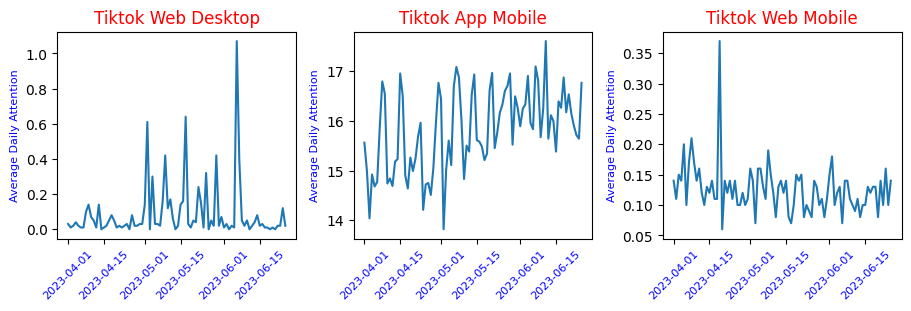

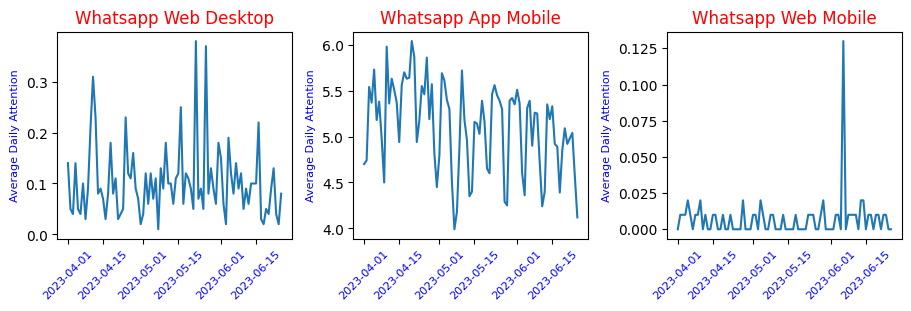

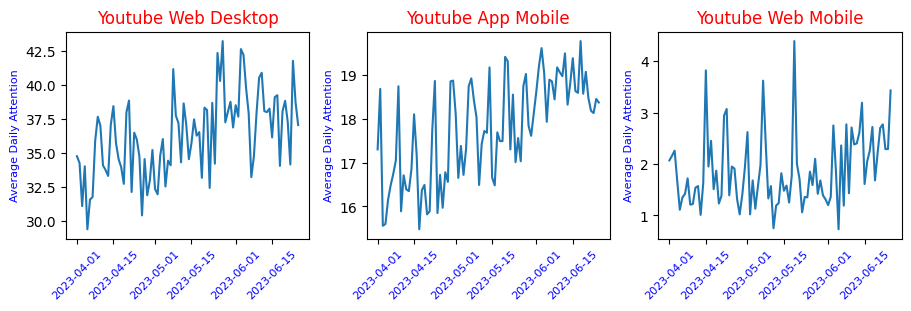

In [27]:
for source in range(0, len(list_features), 3):
    plot3_average_daily_duration(df_da_12, source)  

**Отмечаем**:
* возможны тенденции для следующих источников:
    * *Tiktok App Mobile*,
    * *Whatsapp App Mobile*,
    * *Youtube Web Desktop*,
    * *Youtube App Mobile*,.
* для остальных источников визуально определить тренды невозможно;
* посетители от 12 до 24 лет редко пользуются 'Whatsapp Web Mobile'.  

### 4.4.2. Анализ на наличие трендов и сезонности `Average Daily Duration` по возрастной категории 'от 12 до 24 лет'.

  0%|          | 0/9 [00:00<?, ?it/s]

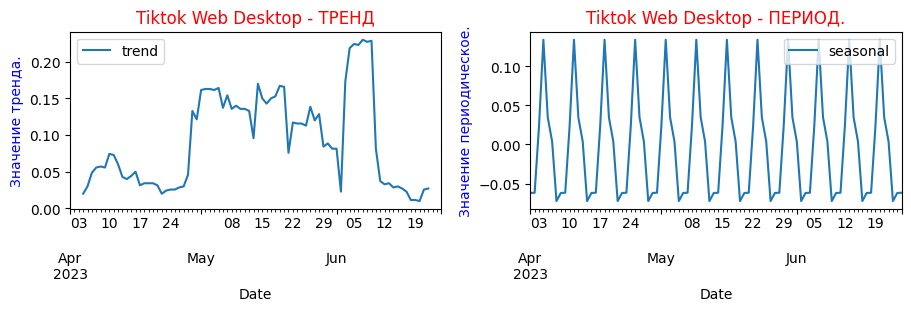

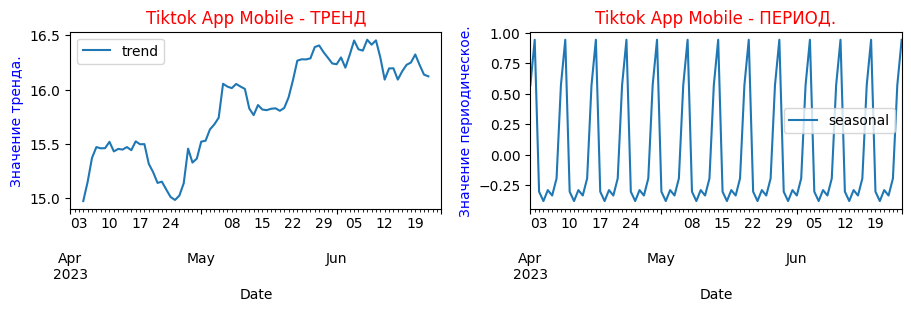

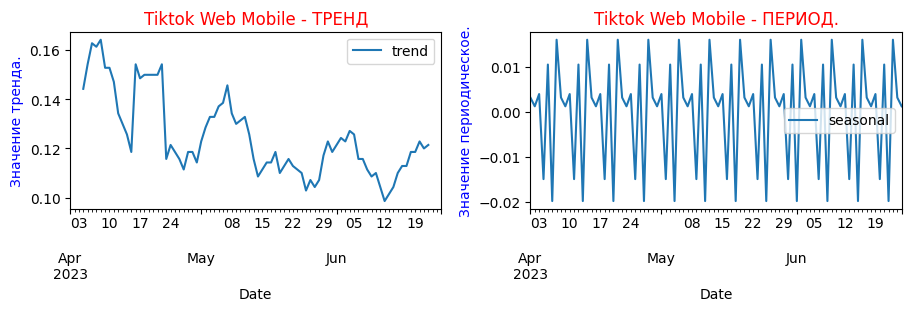

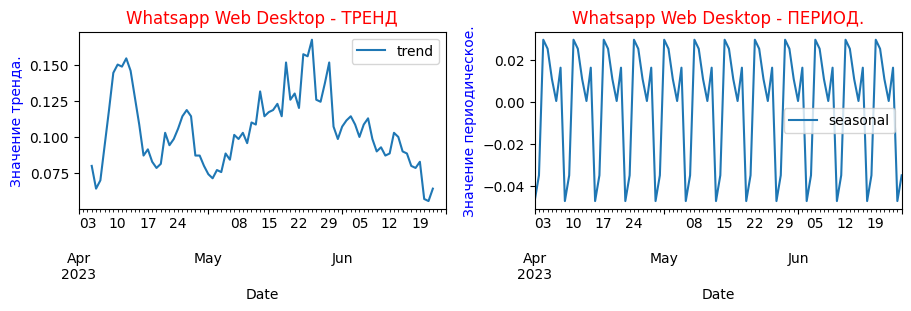

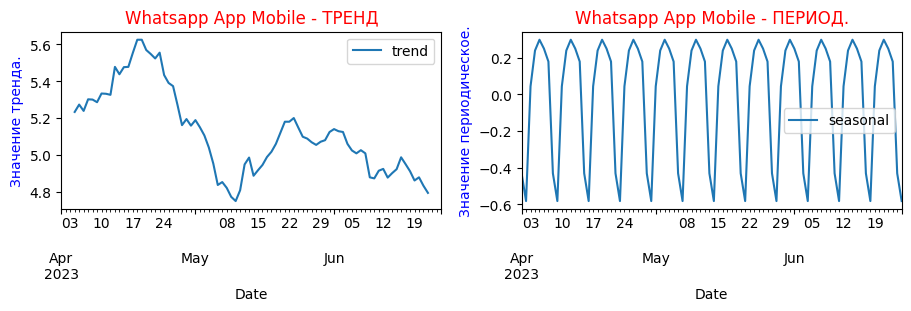

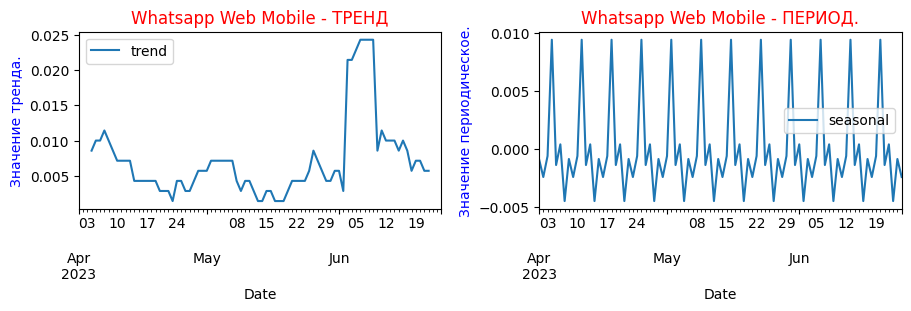

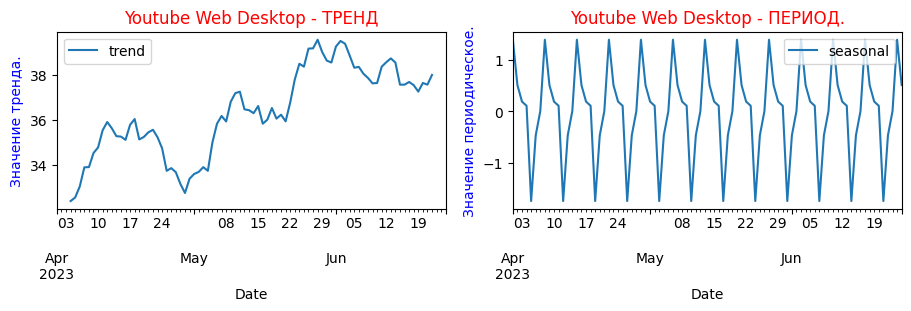

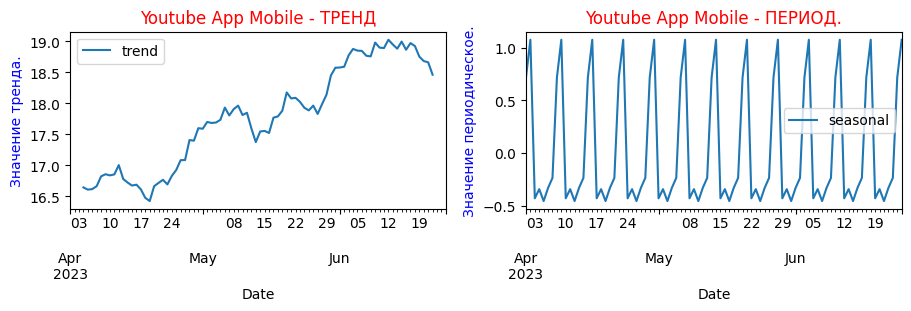

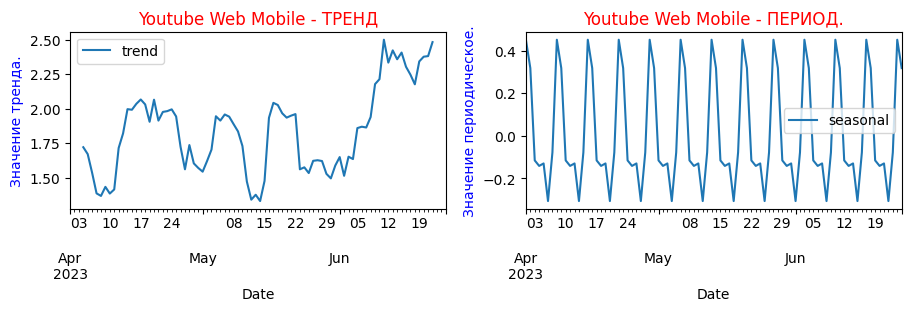

In [28]:
trend_seasonality(df_da_12, list_features)

**Отмечаем**, для возрастной группы 'от 12 до 24 лет':
* Возможные отрицательный тренд для *Tiktok Web mobile* и положительные для *Yuotube Web Desktop* и *Yuotube App Mobile*.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.

**Изучим сезонную (периодическую) составляющую за неделю.**

Дни недели:
23-04-01 - Sat           23-04-02 - Sun           23-04-03 - Mon           23-04-04 - Tue
23-04-05 - Wed           23-04-06 - Thu           23-04-07 - Fri           23-04-08 - Sat
23-04-09 - Sun           23-04-10 - Mon           23-04-11 - Tue           23-04-12 - Wed
23-04-13 - Thu           23-04-14 - Fri           23-04-15 - Sat           23-04-16 - Sun


  0%|          | 0/3 [00:00<?, ?it/s]

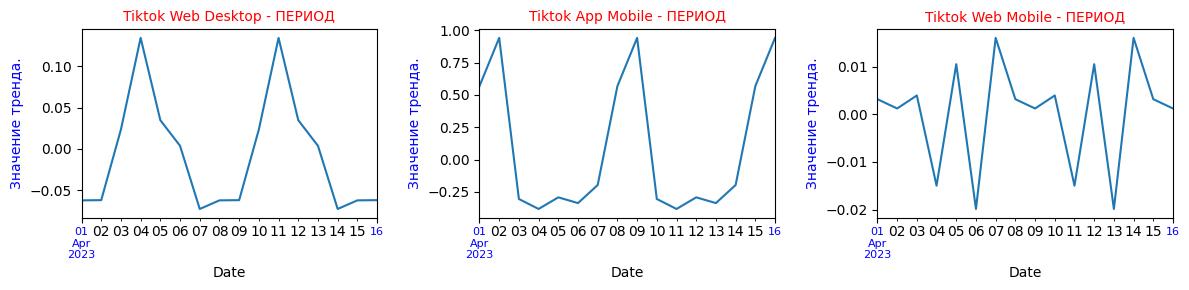

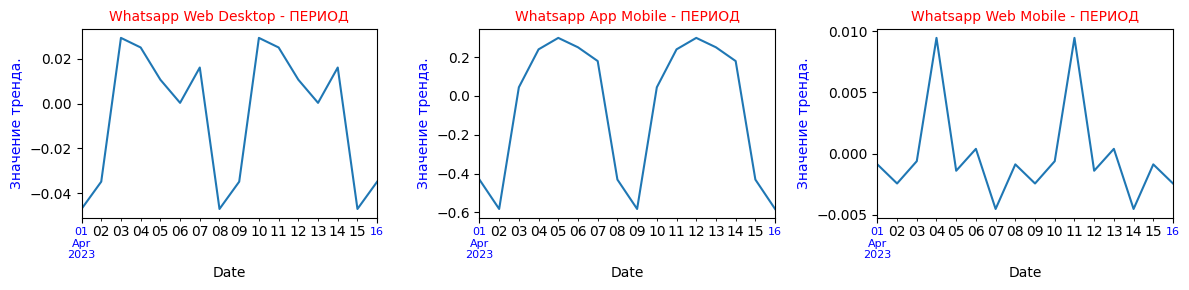

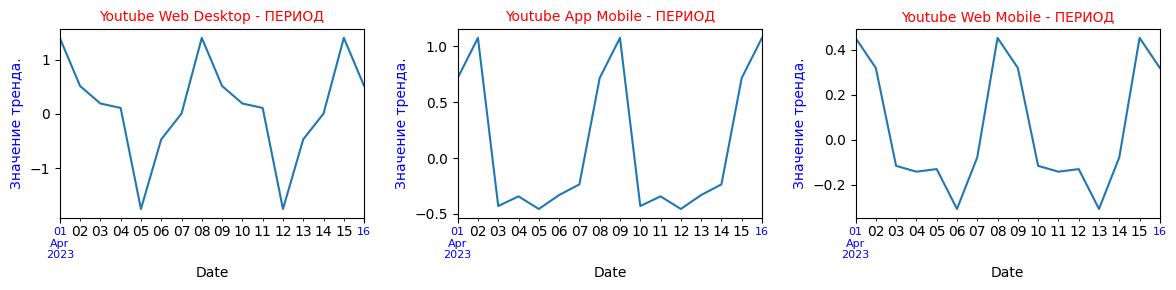

In [29]:
date_start, date_stop = '2023-04-01', '2023-04-16'

calc_print_weekday(date_start, date_stop) 
all_seasonal(df_da_12, list_features)

**Отмечаем**:
* Для всех источников наблюдается периодичность величиной - 1 неделя.
* Для трех источников информации ('Tiktok Web Desktop', 'Whatsapp Web Desktop', 'Whatsapp App Mobile') можно говорить о том, что проведенное на медиа объекте пользователями возрастной группы 'от 12 до 24 лет' уменьшается в выходные и резко возрастает в рабочие дни.
* Ещё для четырёх источников информации ('Tiktok App Mobile', 'Youtube Web Desktop', 'Youtube App Mobile'б , 'Youtube Web Mobile') наблюдаем противоположную картину, с максимумами в выходные дни и минимумами в рабочие дни.

**Оценку стационарности проведём 2 способами**:
* `визуально`,
* применив тест `Дики-Фуллера`.

  0%|          | 0/3 [00:00<?, ?it/s]

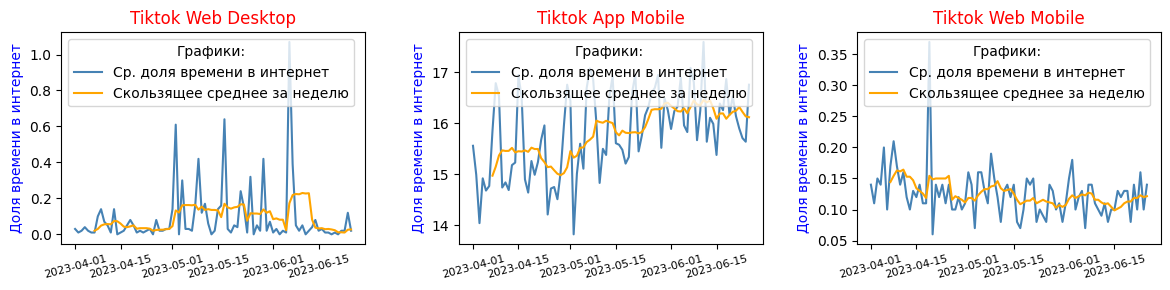

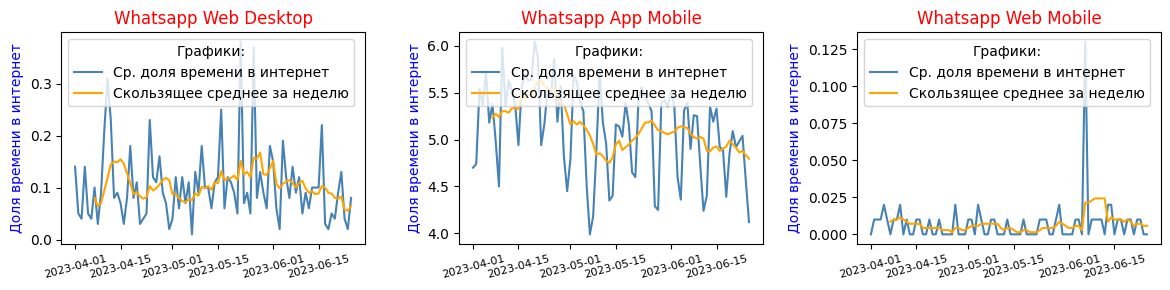

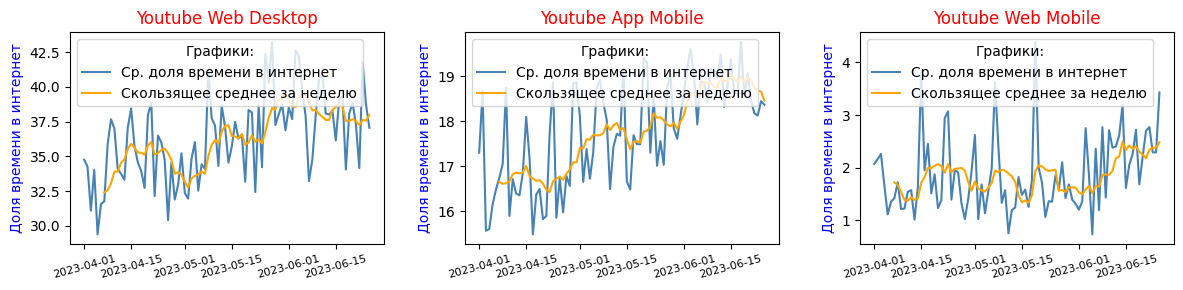

In [30]:
visual_stationarity_full(df_da_12, list_features)

**Отмечаем** возможные тренды:
* для *Tiktok Web Mobile* на убывание;
* для всех источников *Youtube* и *Tiktok App Mobile* на возрастание.

**Тест `Дики-Фуллера` (Dickey-Fuller test)**.

Тест заключается в том, что нужно выполнить статистическую проверку следующей гипотезы:
* Нулевая гипотеза H0 предполагает, что процесс нестационарный.
* Альтернативная гипотеза H1, соответственно говорит об обратном. 

Используем пороговое значение, равное 0.05 (5%).

In [31]:
# Настроим, чтобы числа в датасетах отражались с 3 знаками после запятой
pd.set_option('display.float_format', '{:.3f}'.format) 

df_test_DF = pd.DataFrame(columns=[
    'source', 'ADF criterion', 'P-value', 'Critical value 1%',
    'Critical values 5%', 'Conclusion'])

# Запуск исполнения теста
test_DF(df_da_12, list_features)

# Просмотр датафрейма с результатами
display(df_test_DF) 

# Удалим ненужный более датафрейм
del df_test_DF

source  ADF criterion  P-value  Critical value 1%  \
0    Tiktok Web Desktop         -7.985    0.000             -3.510   
1     Tiktok App Mobile         -1.783    0.389             -3.516   
2     Tiktok Web Mobile         -9.709    0.000             -3.510   
3  Whatsapp Web Desktop         -8.948    0.000             -3.510   
4   Whatsapp App Mobile         -0.757    0.832             -3.516   
5   Whatsapp Web Mobile         -9.860    0.000             -3.510   
6   Youtube Web Desktop         -5.708    0.000             -3.510   
7    Youtube App Mobile         -1.165    0.689             -3.516   
8    Youtube Web Mobile         -7.009    0.000             -3.510   

   Critical values 5%       Conclusion  
0              -2.896     Стационарен.  
1              -2.899  НЕ стационарен!  
2              -2.896     Стационарен.  
3              -2.896     Стационарен.  
4              -2.899  НЕ стационарен!  
5              -2.896     Стационарен.  
6              -2.896     Стационарен.  
7              -2.899  НЕ стационарен!  
8              -2.896     Стационарен.

**Промежуточные выводы** для возрастной группы 'от 12 до 24 лет':
* Посетители в возрасте от 12 до 24 лет редко пользуются 'Whatsapp Web Mobile'.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.
* Тест Дики-Фуллера не опровергает гипотезу о нестационарности временного ряда(наличии устойчивого тренда) для следующих источников:
    * 'Tiktok App Mobile',
    * 'Whatsapp App Mobile',
    * 'Youtube App Mobile'. 

In [32]:
# Удалим более ненужный датафрейм.
del df_da_12

## 4.5. Анализ Average Daily Attention по возрастной категории 'от 25 до 34 лет'.

In [33]:
print("Размер полного датафрейма:", df_da.shape)

df_da_24 = df_da[df_da.age == 25]
if (df_da.shape[0] / 6 == df_da_24.shape[0]):
    print("Выделение части датафрейма проведено корректно.")
else:
    print("Произошла потеря данных!")
    
print("Размер датафрейма по возрастной категории 'от 25 до 34 лет':", 
      df_da_24.shape)
df_da_24.head(3)

Размер полного датафрейма: (516, 11)
Выделение части датафрейма проведено корректно.
Размер датафрейма по возрастной категории 'от 25 до 34 лет': (86, 11)


Date  Tiktok Web Desktop  Tiktok App Mobile  Tiktok Web Mobile  \
172 2023-04-01               0.010              7.560              0.140   
173 2023-04-02               0.190              7.570              0.100   
174 2023-04-03               0.000              6.750              0.090   

     Whatsapp Web Desktop  Whatsapp App Mobile  Whatsapp Web Mobile  \
172                 0.460                9.380                0.020   
173                 0.080                8.820                0.000   
174                 0.230               10.660                0.010   

     Youtube Web Desktop  Youtube App Mobile  Youtube Web Mobile  age  
172               35.480              15.150               2.240   25  
173               35.650              16.130               2.380   25  
174               25.610              14.130               2.000   25

### 4.5.1. Графическое представление Average Daily Attention по возрастной категории 'от 25 до 34 лет'.

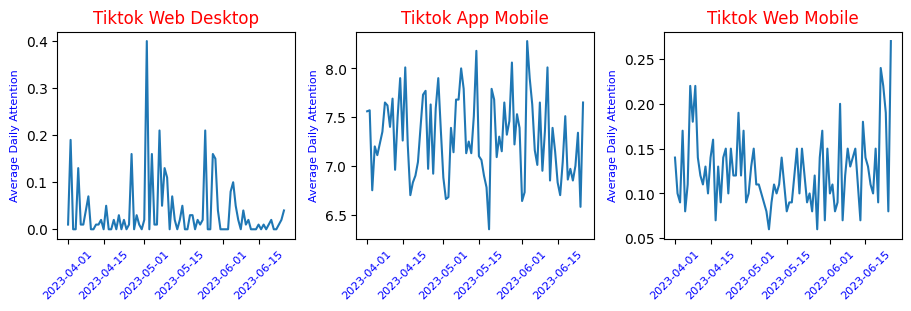

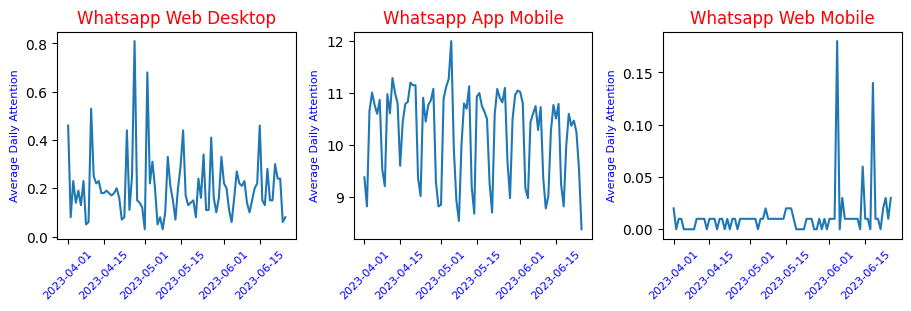

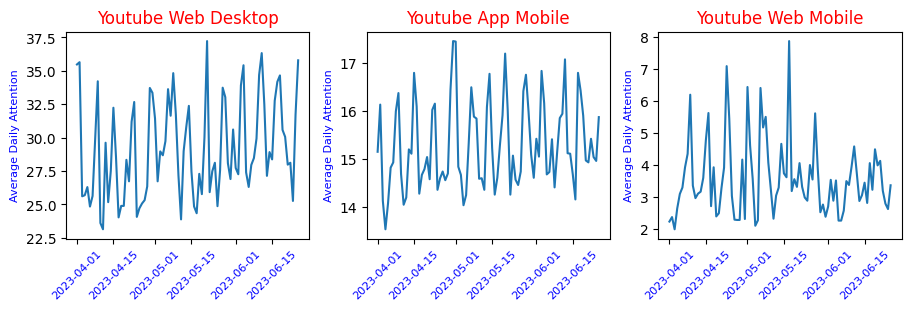

In [34]:
for source in range(0, len(list_features), 3):
    plot3_average_daily_duration(df_da_24, source) 

**Отмечаем**:
* возможны тенденции для следующих источников:
    * *Youtube Web Desktop*,
    * *Youtube App Mobile*,.
* для остальных источников визуально определить тренды невозможно;
* посетители от 25 до 34 лет редко пользуются 'Whatsapp Web Mobile'.  

### 4.5.2. Анализ на наличие трендов и сезонности `Average Daily Duration` по возрастной категории 'от 25 до 34 лет'.

  0%|          | 0/9 [00:00<?, ?it/s]

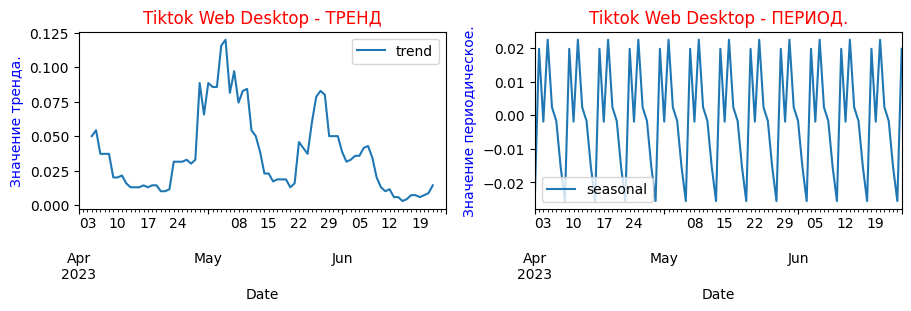

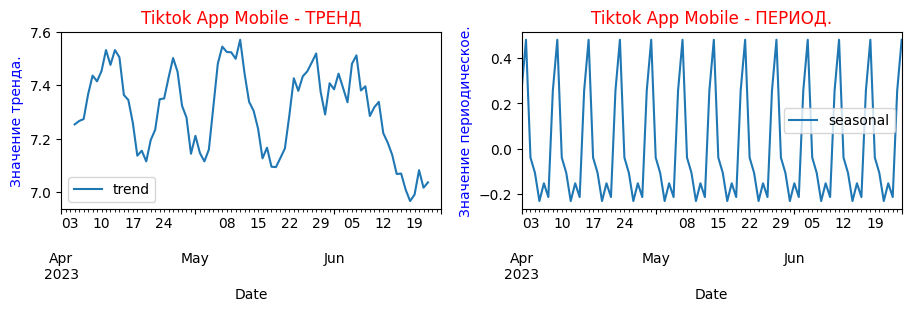

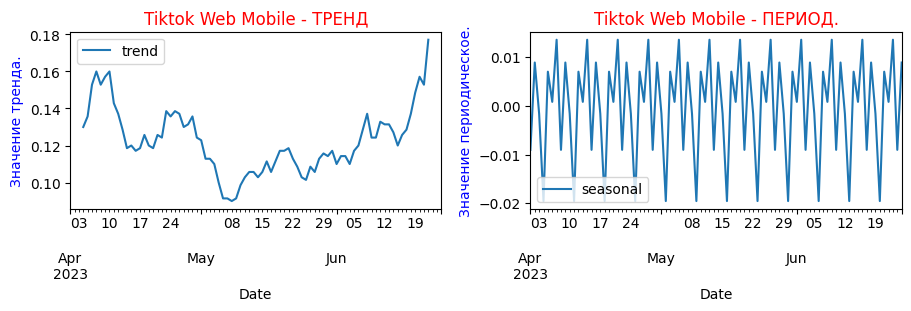

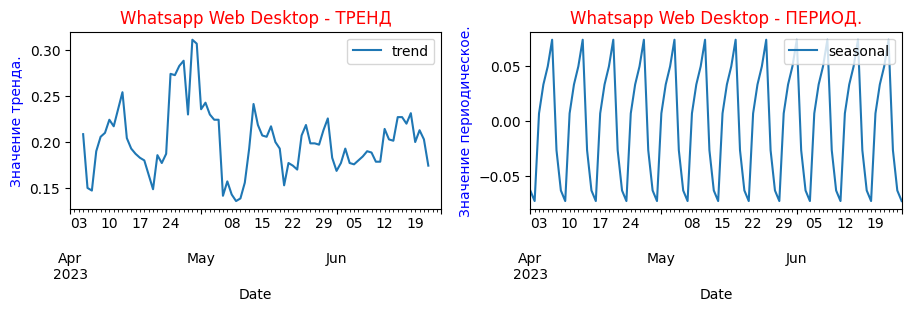

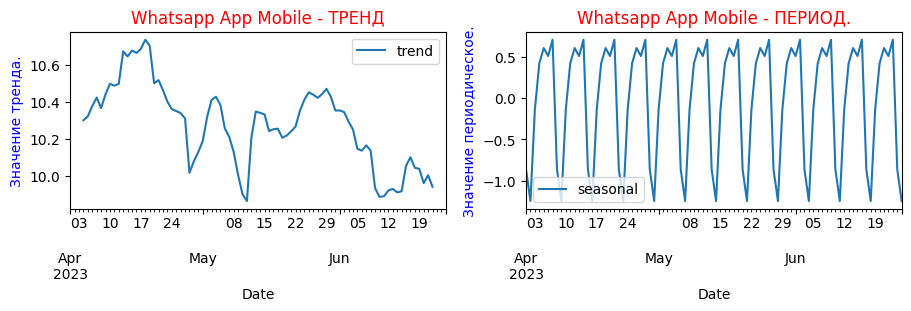

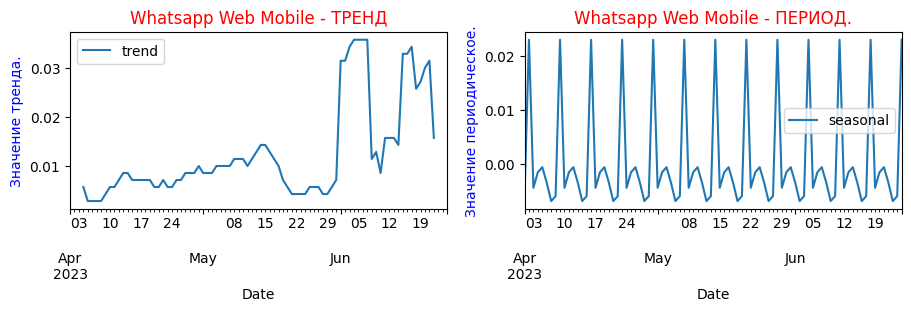

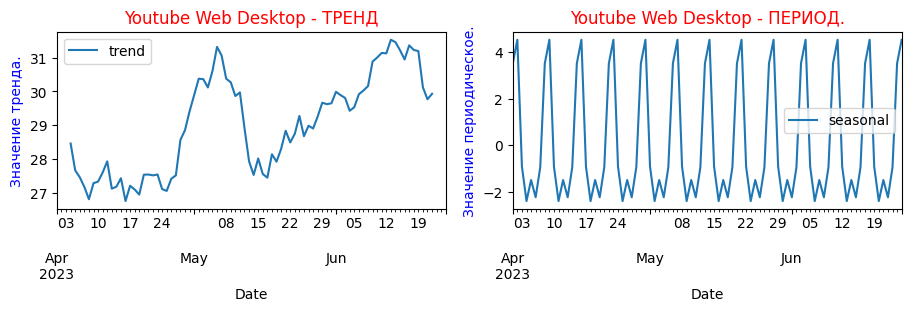

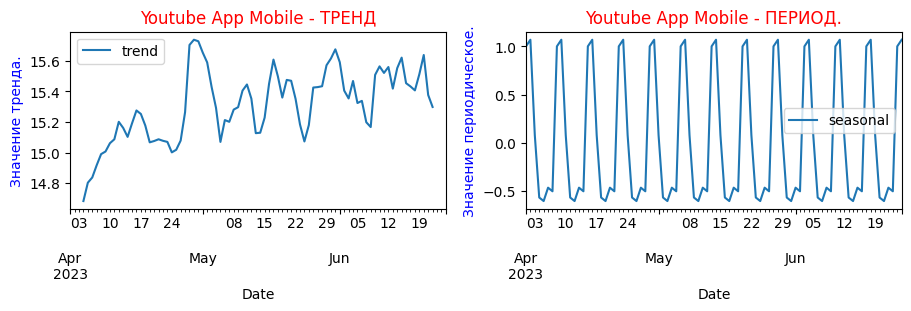

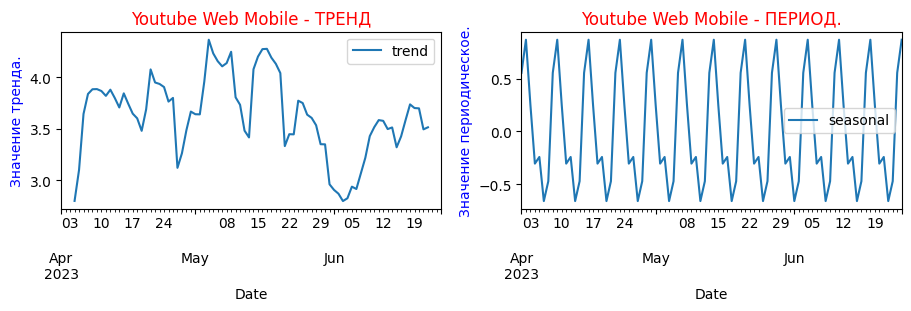

In [35]:
trend_seasonality(df_da_24, list_features)

**Отмечаем**, для возрастной группы 'от 25 до 34 лет':
* Возможные положительные тренд для *Whatsapp Web mobile*, *Yuotube Web Desktop* и *Yuotube App Mobile*.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.

**Изучим сезонную (периодическую) составляющую за неделю.**

Дни недели:
23-04-01 - Sat           23-04-02 - Sun           23-04-03 - Mon           23-04-04 - Tue
23-04-05 - Wed           23-04-06 - Thu           23-04-07 - Fri           23-04-08 - Sat
23-04-09 - Sun           23-04-10 - Mon           23-04-11 - Tue           23-04-12 - Wed
23-04-13 - Thu           23-04-14 - Fri           23-04-15 - Sat           23-04-16 - Sun


  0%|          | 0/3 [00:00<?, ?it/s]

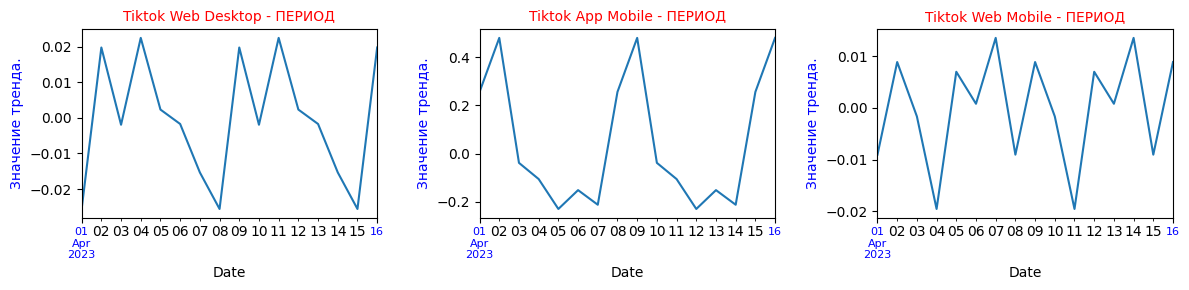

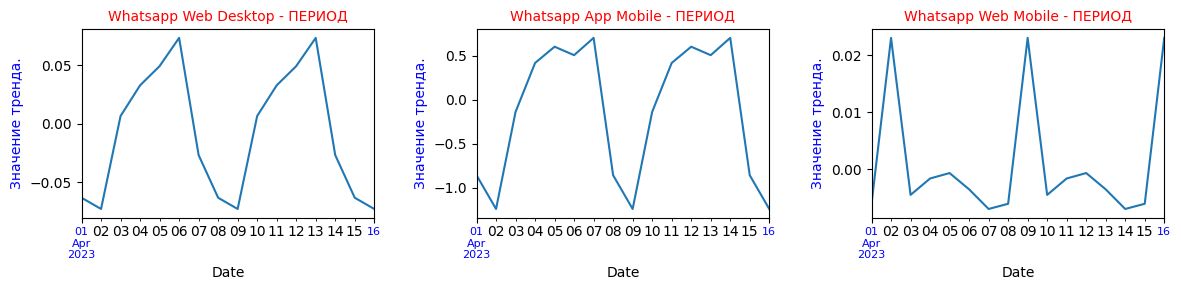

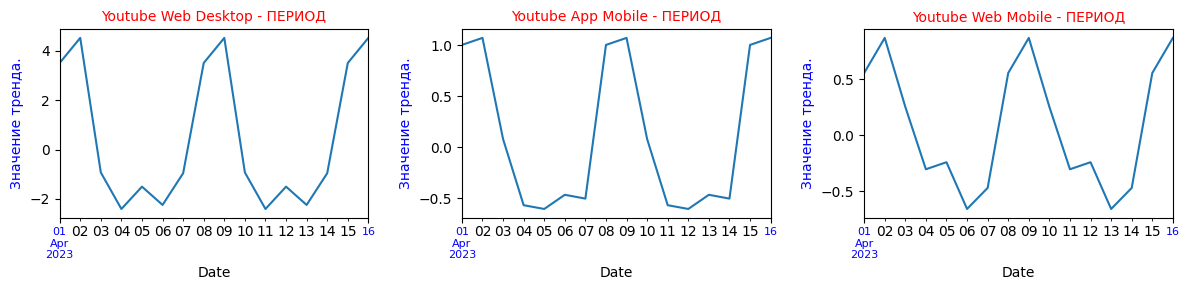

In [36]:
date_start, date_stop = '2023-04-01', '2023-04-16'

calc_print_weekday(date_start, date_stop) 
all_seasonal(df_da_24, list_features)

**Отмечаем**:
* Для всех источников наблюдается периодичность величиной - 1 неделя.
* Для трех источников информации ('Tiktok Web Desktop', 'Whatsapp Web Desktop', 'Whatsapp App Mobile') можно говорить о том, что проведенное на медиа объекте пользователями возрастной группы 'от 25 до 34 лет' уменьшается в выходные и резко возрастает в рабочие дни.
* Ещё для пяти источников информации ('Tiktok App Mobile', 'Whatsapp Web Mobile', 'Youtube Web Desktop', 'Youtube App Mobile', 'Youtube Web Mobile') наблюдаем противоположную картину, с максимумами в выходные дни и минимумами в рабочие дни.

**Оценку стационарности проведём 2 способами**:
* `визуально`,
* применив тест `Дики-Фуллера`.

  0%|          | 0/3 [00:00<?, ?it/s]

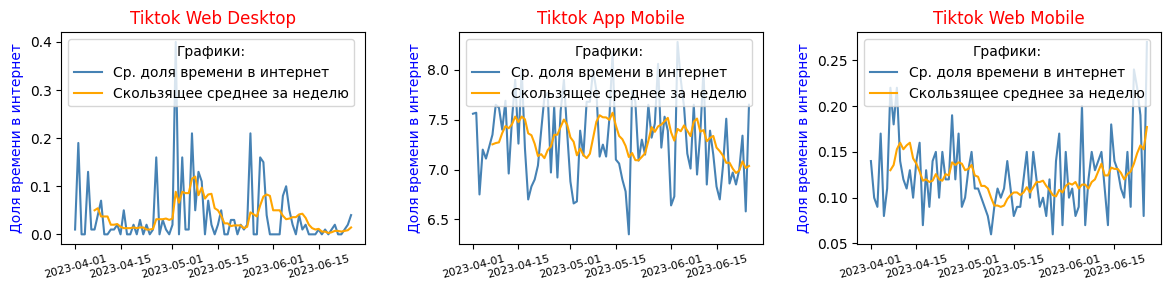

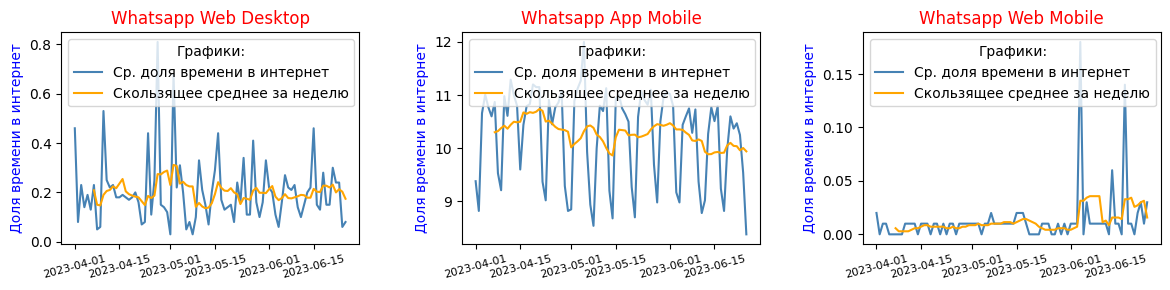

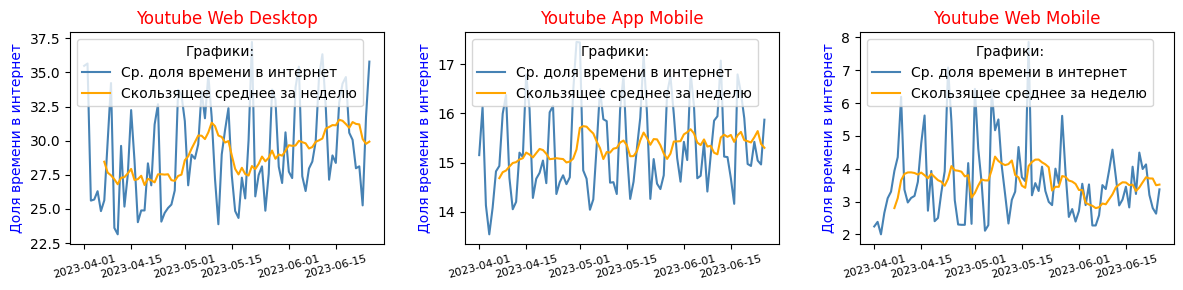

In [37]:
visual_stationarity_full(df_da_24, list_features)

**Отмечаем** возможные тренды:
* для *Yuotube Web Desktop* и *Youtube App Mobile*на возрастание.

**Тест `Дики-Фуллера` (Dickey-Fuller test)**.

Тест заключается в том, что нужно выполнить статистическую проверку следующей гипотезы:
* Нулевая гипотеза H0 предполагает, что процесс нестационарный.
* Альтернативная гипотеза H1, соответственно говорит об обратном. 

Используем пороговое значение, равное 0.05 (5%).

In [38]:
# Настроим, чтобы числа в датасетах отражались с 3 знаками после запятой
pd.set_option('display.float_format', '{:.3f}'.format) 

df_test_DF = pd.DataFrame(columns=[
    'source', 'ADF criterion', 'P-value', 'Critical value 1%',
    'Critical values 5%', 'Conclusion'])

# Запуск исполнения теста
test_DF(df_da_24, list_features)

# Просмотр датафрейма с результатами
display(df_test_DF) 

# Удалим ненужный более датафрейм
del df_test_DF

source  ADF criterion  P-value  Critical value 1%  \
0    Tiktok Web Desktop         -9.455    0.000             -3.510   
1     Tiktok App Mobile         -7.541    0.000             -3.510   
2     Tiktok Web Mobile         -3.508    0.008             -3.512   
3  Whatsapp Web Desktop         -6.609    0.000             -3.513   
4   Whatsapp App Mobile         -1.489    0.539             -3.516   
5   Whatsapp Web Mobile         -9.679    0.000             -3.510   
6   Youtube Web Desktop         -1.753    0.404             -3.523   
7    Youtube App Mobile         -6.817    0.000             -3.514   
8    Youtube Web Mobile         -6.538    0.000             -3.513   

   Critical values 5%       Conclusion  
0              -2.896     Стационарен.  
1              -2.896     Стационарен.  
2              -2.897     Стационарен.  
3              -2.897     Стационарен.  
4              -2.899  НЕ стационарен!  
5              -2.896     Стационарен.  
6              -2.902  НЕ стационарен!  
7              -2.898     Стационарен.  
8              -2.897     Стационарен.

**Промежуточные выводы** для возрастной группы 'до 25 до 34 лет':
* Посетители в возрасте от 25 до 34 лет редко пользуются 'Whatsapp Web Mobile'.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.
* Тест Дики-Фуллера не опровергает гипотезу о нестационарности временного ряда(наличии устойчивого тренда) для следующих источников:
    * 'Whatsapp App Mobile',
    * 'Youtube Web Desktop'.

In [39]:
# Удалим более ненужный датафрейм.
del df_da_24

## 4.6. Анализ Average Daily Attention по возрастной категории 'от 35 до 44 лет'.

In [40]:
print("Размер полного датафрейма:", df_da.shape)

df_da_34 = df_da[df_da.age == 35]
if (df_da.shape[0] / 6 == df_da_34.shape[0]):
    print("Выделение части датафрейма проведено корректно.")
else:
    print("Произошла потеря данных!")
    
print("Размер датафрейма по возрастной категории 'от 35 до 44 лет':", 
      df_da_34.shape)
df_da_34.head(3)

Размер полного датафрейма: (516, 11)
Выделение части датафрейма проведено корректно.
Размер датафрейма по возрастной категории 'от 35 до 44 лет': (86, 11)


Date  Tiktok Web Desktop  Tiktok App Mobile  Tiktok Web Mobile  \
258 2023-04-01               0.020              6.710              0.110   
259 2023-04-02               0.010              6.120              0.120   
260 2023-04-03               0.020              5.800              0.140   

     Whatsapp Web Desktop  Whatsapp App Mobile  Whatsapp Web Mobile  \
258                 0.130               10.350                0.020   
259                 0.220                9.320                0.010   
260                 0.630               12.260                0.010   

     Youtube Web Desktop  Youtube App Mobile  Youtube Web Mobile  age  
258               29.370              13.700               3.060   35  
259               25.950              14.070               2.440   35  
260               19.100              12.270               2.180   35

### 4.6.1. Графическое представление Average Daily Attention по возрастной категории 'от 35 до 44 лет'.

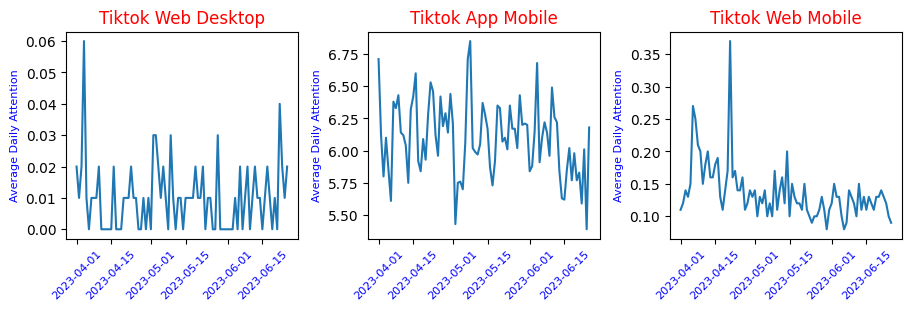

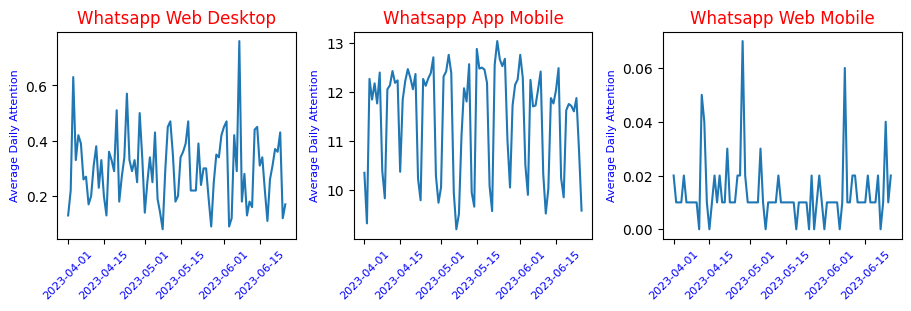

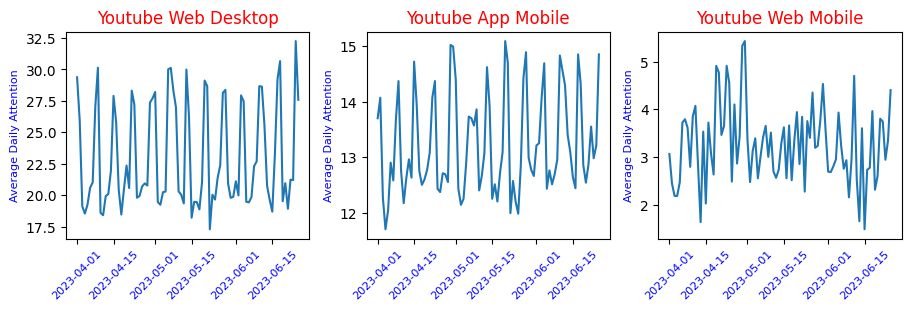

In [41]:
for source in range(0, len(list_features), 3):
    plot3_average_daily_duration(df_da_34, source) 

**Отмечаем**:
* возможна отрицательная тенденция для *Youtube Web Desktop*.
* для остальных источников визуально определить тренды невозможно;
* посетители от 35 до 44 лет редко пользуются 'Whatsapp Web Mobile'.  

##### 4.6.2. Анализ на наличие трендов и сезонности `Average Daily Duration` по возрастной категории 'от 35 до 44 лет'.

  0%|          | 0/9 [00:00<?, ?it/s]

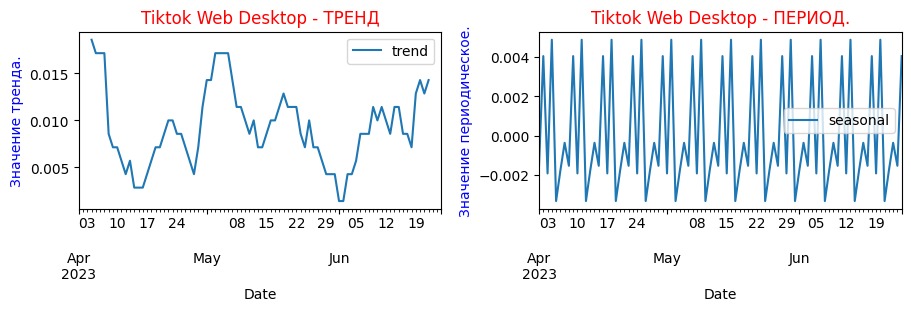

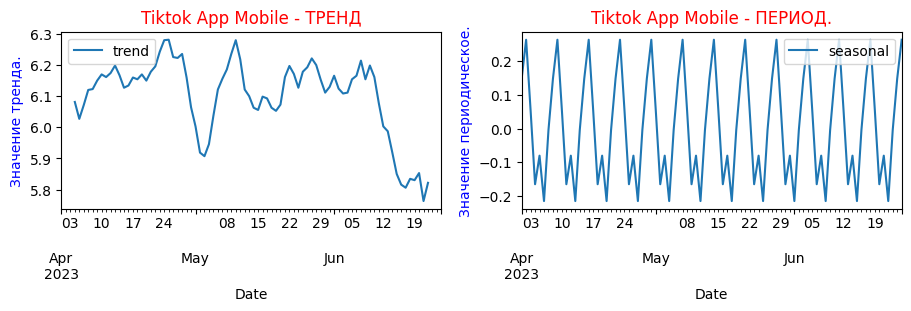

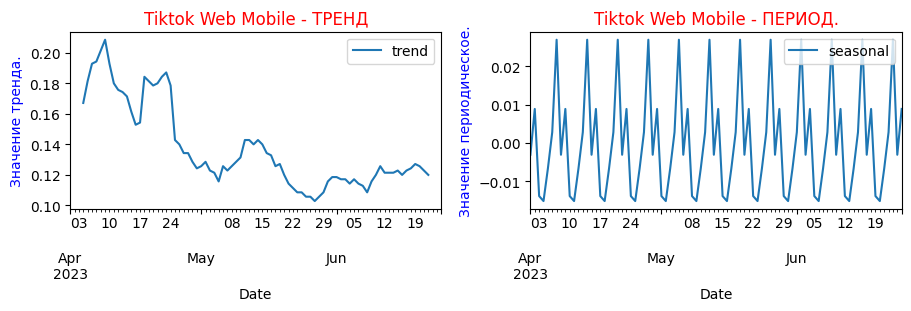

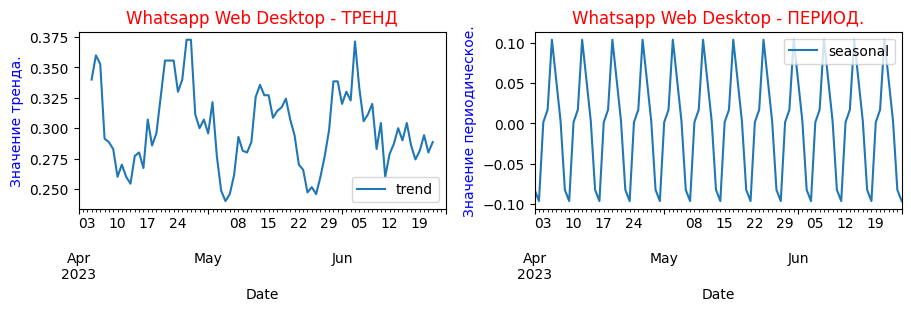

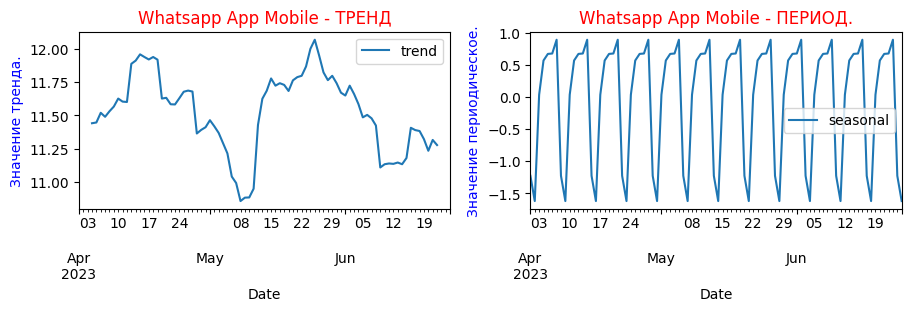

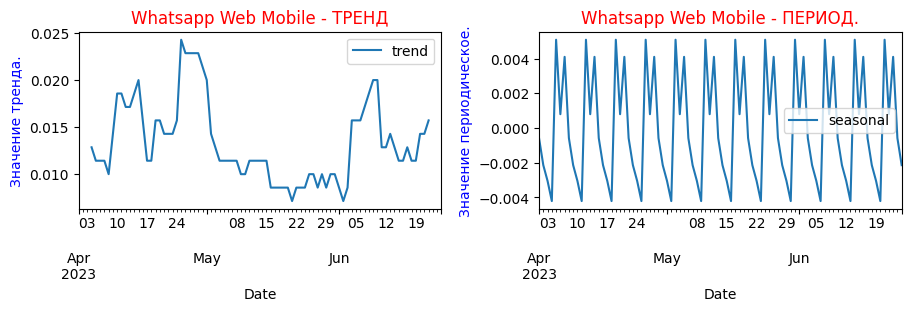

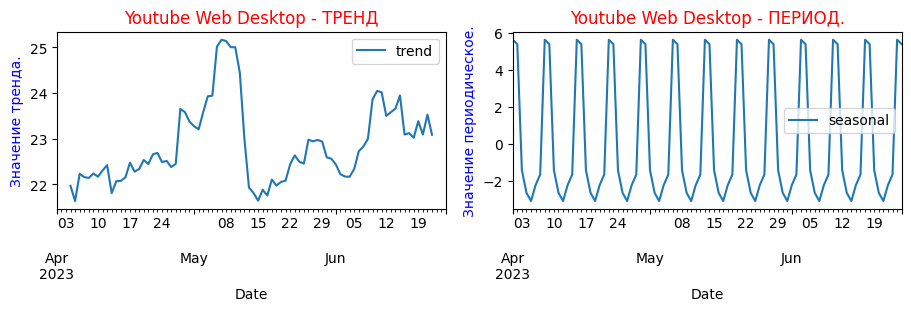

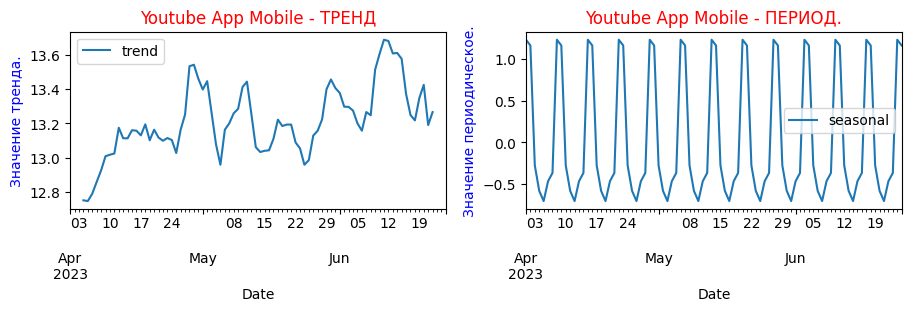

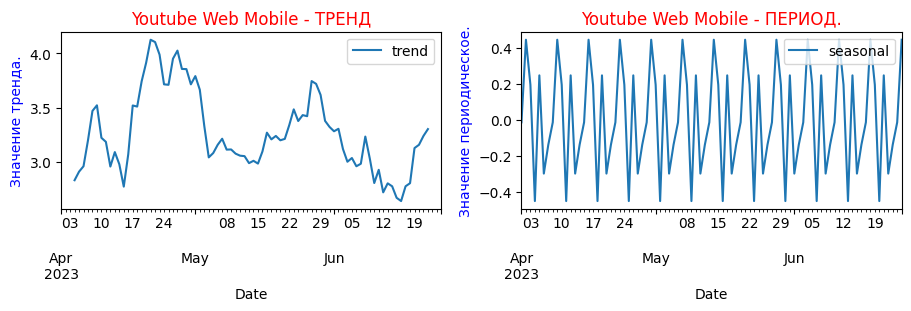

In [42]:
trend_seasonality(df_da_34, list_features)

**Отмечаем**, для возрастной группы 'от 35 до 44 лет':
* Возможен отрицательный тренд для 'Tiktok Web Mobile'.
* Возможные положительные тренд для *Yuotube Web Desktop* и *Yuotube App Mobile*.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.

**Изучим сезонную (периодическую) составляющую за неделю.**

Дни недели:
23-04-01 - Sat           23-04-02 - Sun           23-04-03 - Mon           23-04-04 - Tue
23-04-05 - Wed           23-04-06 - Thu           23-04-07 - Fri           23-04-08 - Sat
23-04-09 - Sun           23-04-10 - Mon           23-04-11 - Tue           23-04-12 - Wed
23-04-13 - Thu           23-04-14 - Fri           23-04-15 - Sat           23-04-16 - Sun


  0%|          | 0/3 [00:00<?, ?it/s]

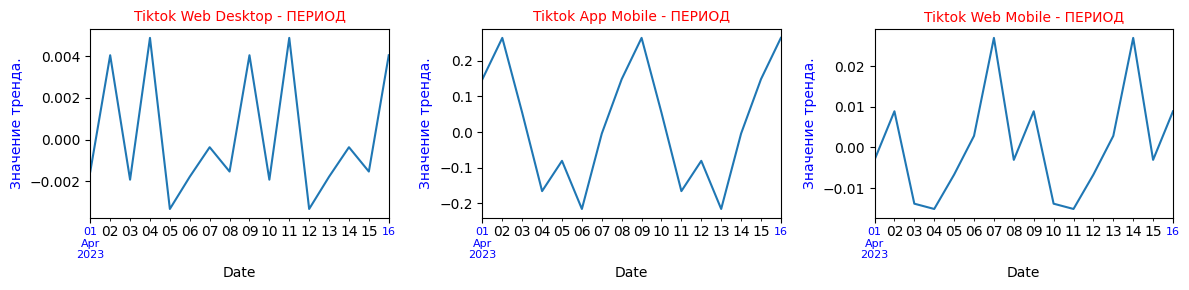

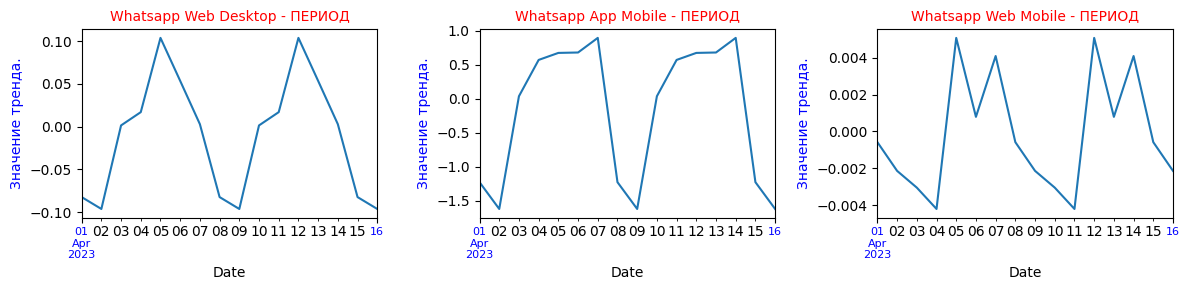

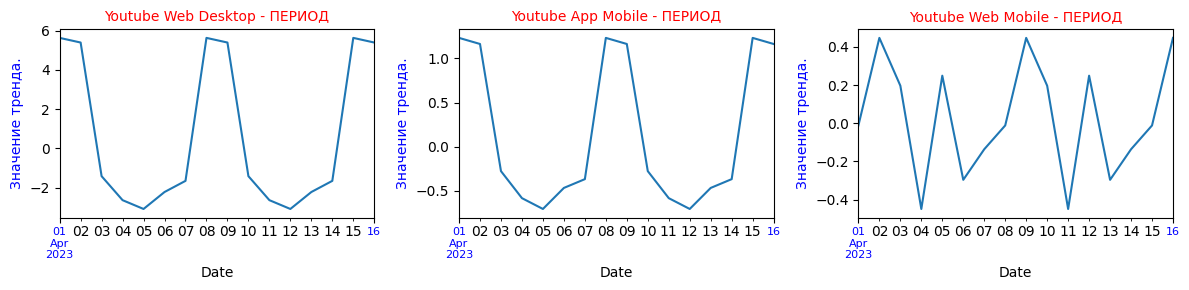

In [43]:
date_start, date_stop = '2023-04-01', '2023-04-16'

calc_print_weekday(date_start, date_stop) 
all_seasonal(df_da_34, list_features)

**Отмечаем**:
* Для всех источников наблюдается периодичность величиной - 1 неделя.
* Для двух источников информации ('Whatsapp Web Desktop', 'Whatsapp App Mobile') можно говорить о том, что проведенное на медиа объекте пользователями возрастной группы 'от 35 до 44 лет' уменьшается в выходные и резко возрастает в рабочие дни.
* Ещё для трёх источников информации ('Tiktok App Mobile', 'Youtube Web Desktop', 'Youtube App Mobile') наблюдаем противоположную картину, с максимумами в выходные дни и минимумами в рабочие дни.

**Оценку стационарности проведём 2 способами**:
* `визуально`,
* применив тест `Дики-Фуллера`.

  0%|          | 0/3 [00:00<?, ?it/s]

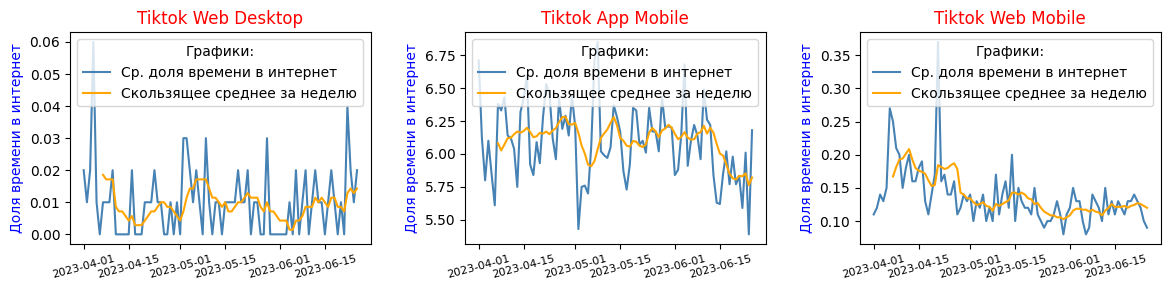

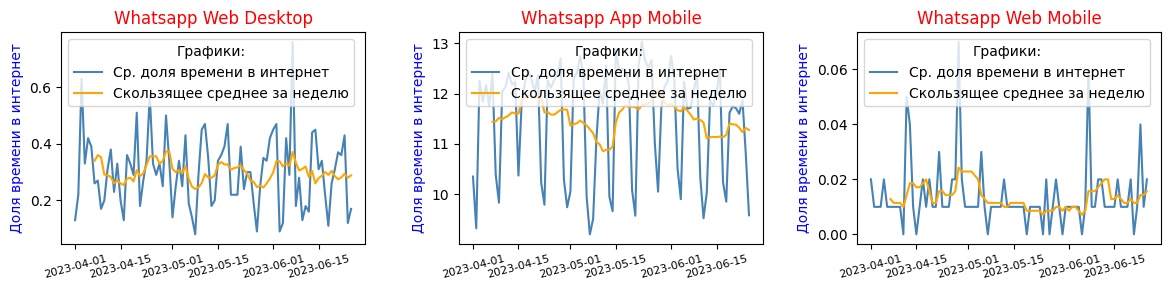

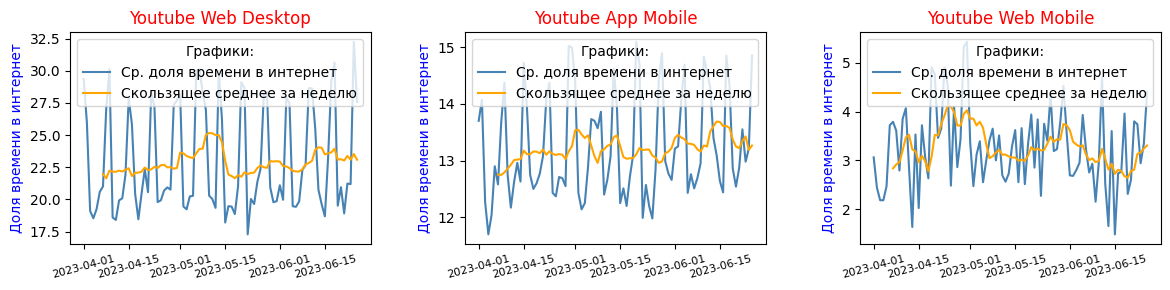

In [44]:
visual_stationarity_full(df_da_34, list_features)

**Отмечаем** возможные тренды:
* для *Yuotube Web Desktop* и *Youtube App Mobile*на возрастание.
* *Tiktok Web Mobile* на убывание.

**Тест `Дики-Фуллера` (Dickey-Fuller test)**.

Тест заключается в том, что нужно выполнить статистическую проверку следующей гипотезы:
* Нулевая гипотеза H0 предполагает, что процесс нестационарный.
* Альтернативная гипотеза H1, соответственно говорит об обратном. 

Используем пороговое значение, равное 0.05 (5%).

In [45]:
# Настроим, чтобы числа в датасетах отражались с 3 знаками после запятой
pd.set_option('display.float_format', '{:.3f}'.format) 

df_test_DF = pd.DataFrame(columns=[
    'source', 'ADF criterion', 'P-value', 'Critical value 1%',
    'Critical values 5%', 'Conclusion'])

# Запуск исполнения теста
test_DF(df_da_34, list_features)

# Просмотр датафрейма с результатами
display(df_test_DF) 

# Удалим ненужный более датафрейм
del df_test_DF

source  ADF criterion  P-value  Critical value 1%  \
0    Tiktok Web Desktop         -8.286    0.000             -3.510   
1     Tiktok App Mobile         -2.043    0.268             -3.517   
2     Tiktok Web Mobile         -2.097    0.246             -3.514   
3  Whatsapp Web Desktop         -4.658    0.000             -3.523   
4   Whatsapp App Mobile         -1.705    0.428             -3.516   
5   Whatsapp Web Mobile         -8.469    0.000             -3.510   
6   Youtube Web Desktop         -2.737    0.068             -3.518   
7    Youtube App Mobile         -3.160    0.022             -3.516   
8    Youtube Web Mobile         -7.544    0.000             -3.510   

   Critical values 5%       Conclusion  
0              -2.896     Стационарен.  
1              -2.899  НЕ стационарен!  
2              -2.898  НЕ стационарен!  
3              -2.902     Стационарен.  
4              -2.899  НЕ стационарен!  
5              -2.896     Стационарен.  
6              -2.900  НЕ стационарен!  
7              -2.899     Стационарен.  
8              -2.896     Стационарен.

**Промежуточные выводы** для возрастной группы 'до 35 до 44 лет':
* Посетители в возрасте от 35 до 44 лет редко пользуются 'Whatsapp Web Mobile'.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.
* Тест Дики-Фуллера не опровергает гипотезу о нестационарности временного ряда(наличии устойчивого тренда) для следующих источников:
    * 'Tiktok App Mobile',
    * ''Tiktok Web Mobile',
    * 'Whatsapp App Mobile',
    * 'Youtube Web Desktop'.

In [46]:
# Удалим более ненужный датафрейм.
del df_da_34

## 4.7. Анализ Average Daily Attention по возрастной категории 'от 45 до 54 лет'.

In [47]:
print("Размер полного датафрейма:", df_da.shape)

df_da_44 = df_da[df_da.age == 45]
if (df_da.shape[0] / 6 == df_da_44.shape[0]):
    print("Выделение части датафрейма проведено корректно.")
else:
    print("Произошла потеря данных!")
    
print("Размер датафрейма по возрастной категории 'от 45 до 54 лет':", 
      df_da_44.shape)
df_da_44.head(3)

Размер полного датафрейма: (516, 11)
Выделение части датафрейма проведено корректно.
Размер датафрейма по возрастной категории 'от 45 до 54 лет': (86, 11)


Date  Tiktok Web Desktop  Tiktok App Mobile  Tiktok Web Mobile  \
344 2023-04-01               0.000              6.430              0.190   
345 2023-04-02               0.010              6.540              0.330   
346 2023-04-03               0.000              5.800              0.290   

     Whatsapp Web Desktop  Whatsapp App Mobile  Whatsapp Web Mobile  \
344                 0.270               10.030                0.010   
345                 0.190                9.120                0.010   
346                 0.230               10.980                0.000   

     Youtube Web Desktop  Youtube App Mobile  Youtube Web Mobile  age  
344               19.790              14.250               2.530   45  
345               19.420              14.610               2.830   45  
346               12.610              12.930               1.620   45

##### 4.7.1. Графическое представление Average Daily Attention по возрастной категории 'от 45 до 54 лет'.

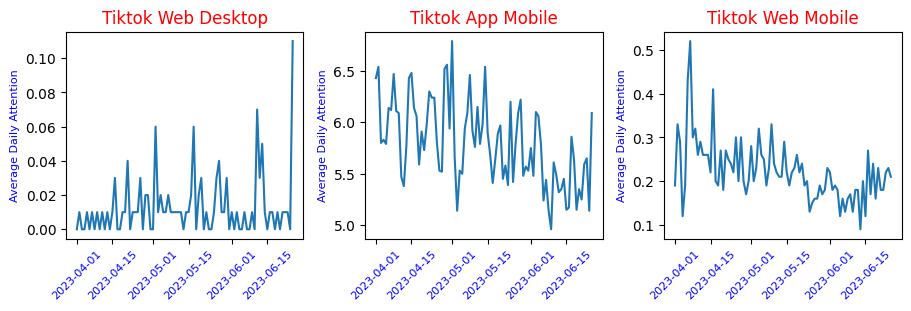

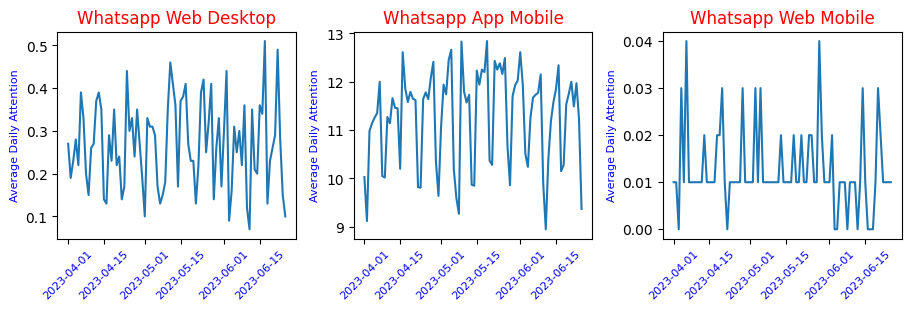

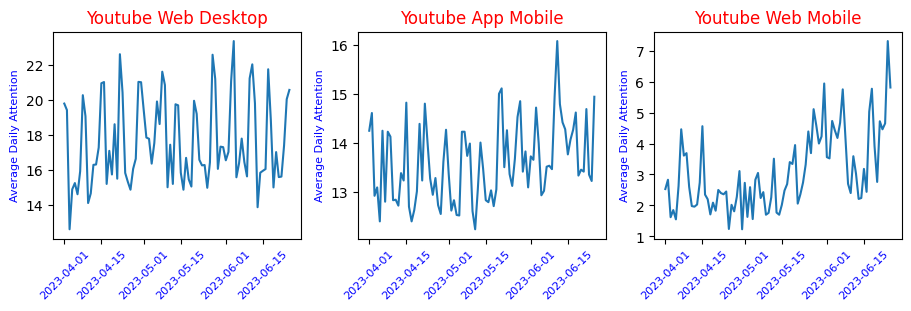

In [48]:
for source in range(0, len(list_features), 3):
    plot3_average_daily_duration(df_da_44, source) 

**Отмечаем**:
* возможны тенденции для следующих источников:
    * *Tiktok App Mobile*,
    * *Tiktok Web Mobile*.
* для остальных источников визуально определить тренды невозможно;
* посетители от 45 до 54 лет редко пользуются 'Whatsapp Web Mobile' и 'Tiktok Web Desktop'.  

##### 4.7.2. Анализ на наличие трендов и сезонности `Average Daily Duration` по возрастной категории 'от 45 до 54 лет'.

  0%|          | 0/9 [00:00<?, ?it/s]

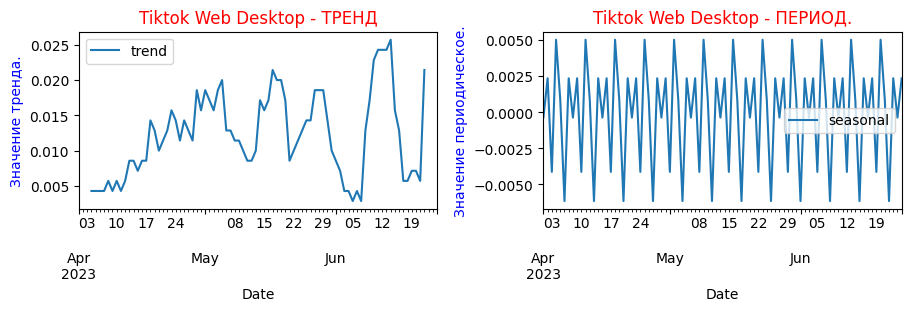

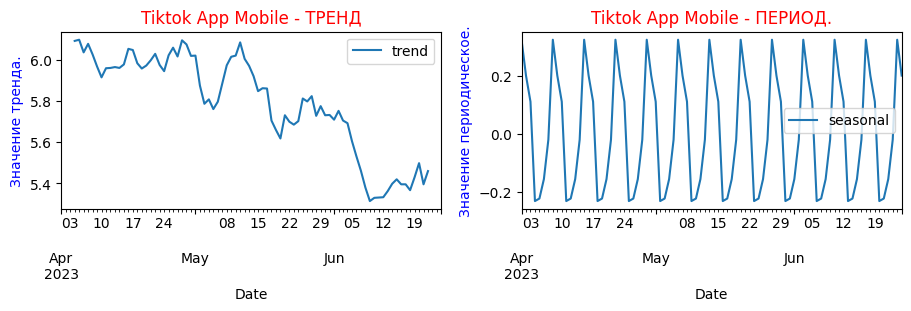

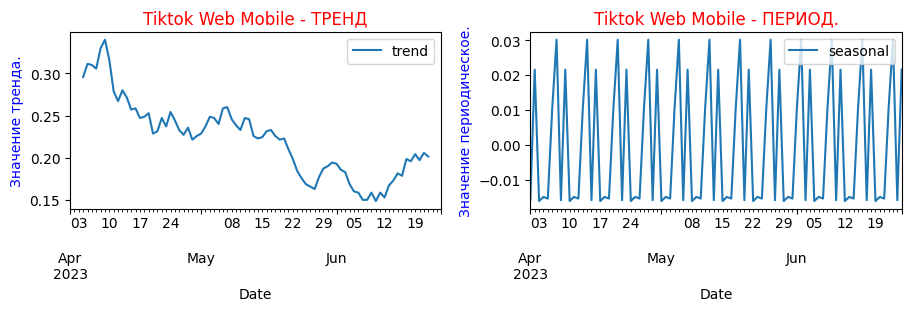

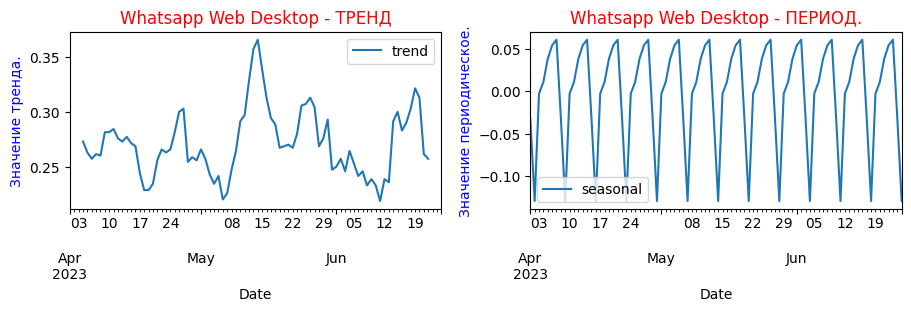

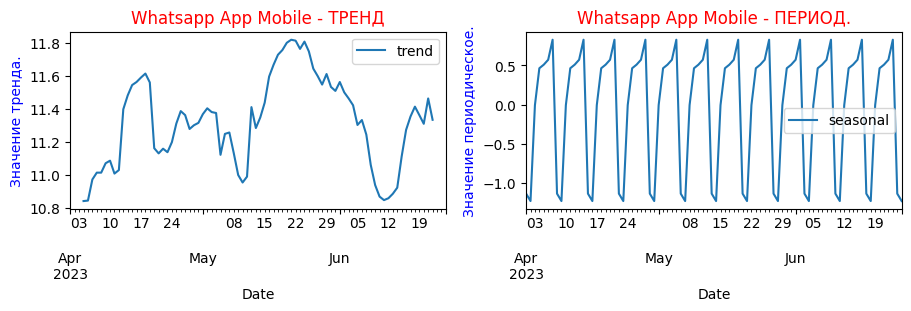

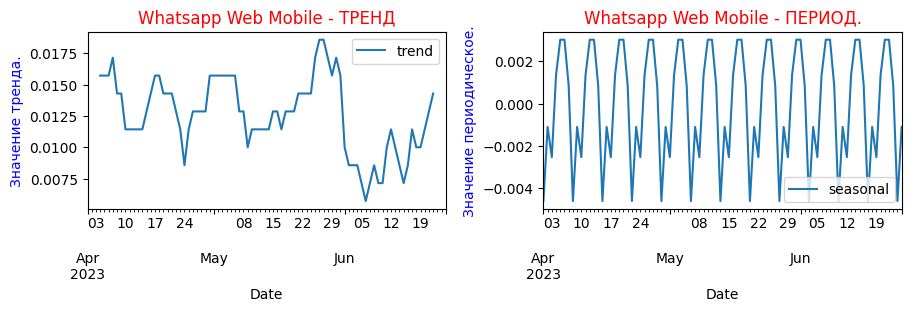

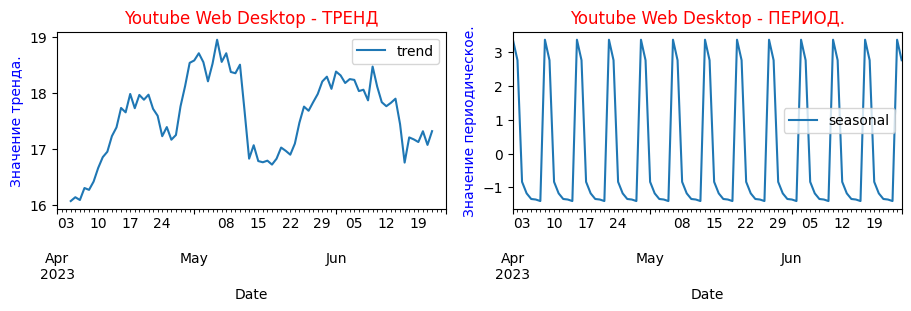

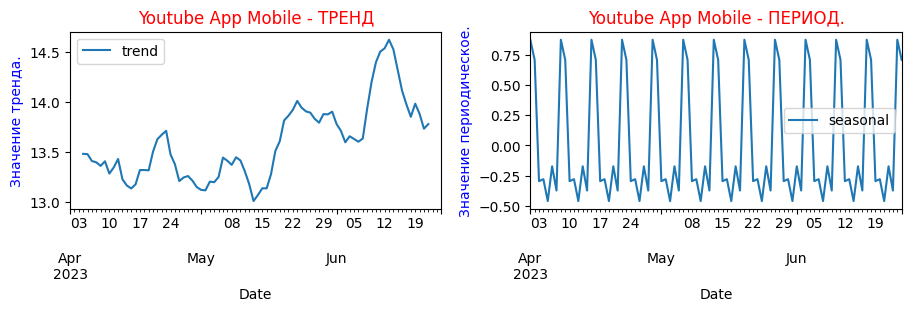

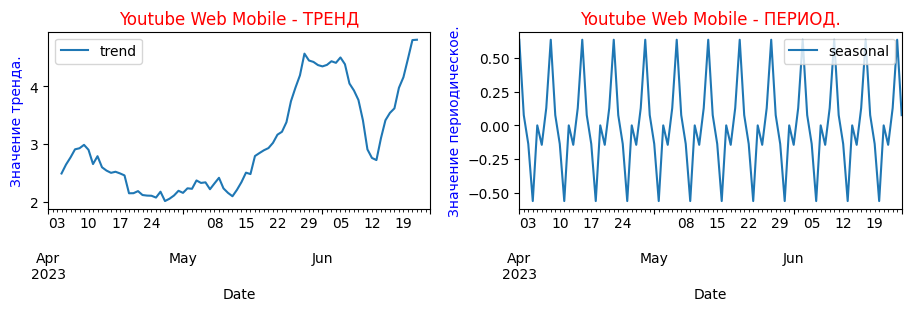

In [49]:
trend_seasonality(df_da_44, list_features)

##### **Отмечаем**, для возрастной группы 'от 45 до 54 лет':
* Возможные отрицательные тренды для *Tiktok Web Mobile* *Tiktok App Mobile*.
* Возможные положительные тренд для *Yuotube Web Desktop* и *Yuotube App Mobile*.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.

**Изучим сезонную (периодическую) составляющую за неделю.**

Дни недели:
23-04-01 - Sat           23-04-02 - Sun           23-04-03 - Mon           23-04-04 - Tue
23-04-05 - Wed           23-04-06 - Thu           23-04-07 - Fri           23-04-08 - Sat
23-04-09 - Sun           23-04-10 - Mon           23-04-11 - Tue           23-04-12 - Wed
23-04-13 - Thu           23-04-14 - Fri           23-04-15 - Sat           23-04-16 - Sun


  0%|          | 0/3 [00:00<?, ?it/s]

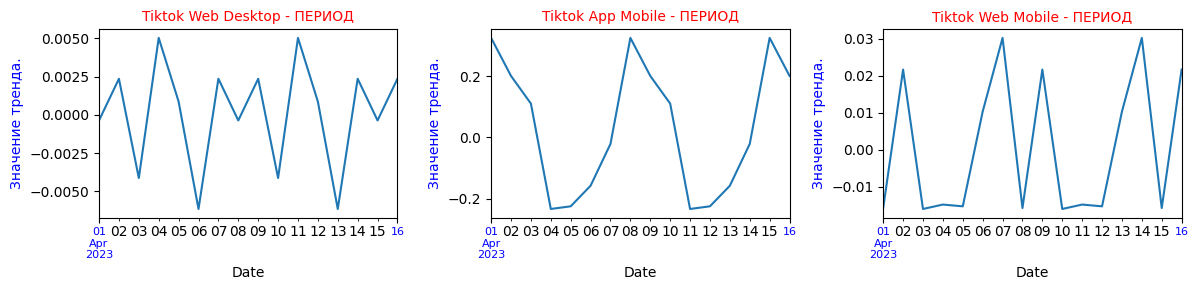

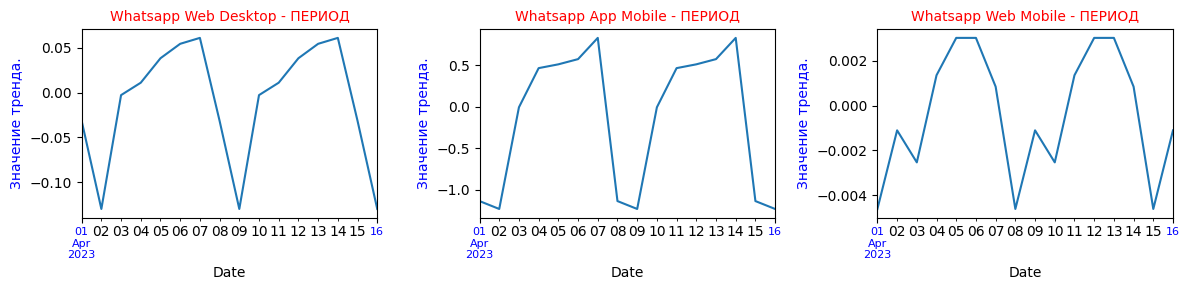

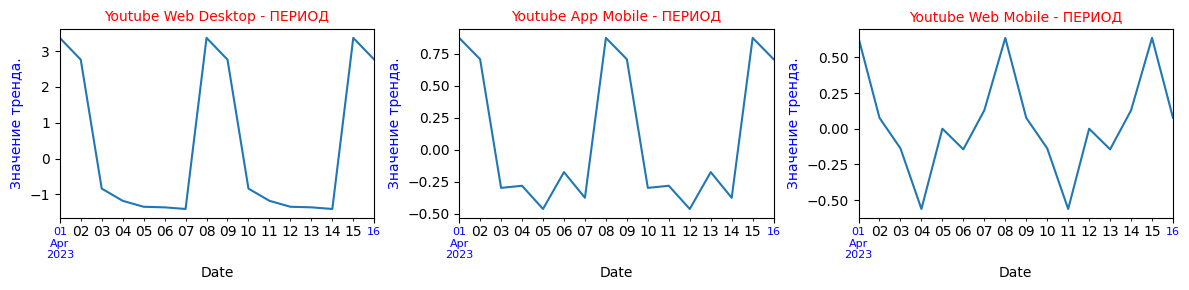

In [50]:
date_start, date_stop = '2023-04-01', '2023-04-16'

calc_print_weekday(date_start, date_stop) 
all_seasonal(df_da_44, list_features)

**Отмечаем**:
* Для всех источников наблюдается периодичность величиной - 1 неделя.
* Для трех источников информации ('Whatsapp Web Desktop', 'Whatsapp App Mobile') можно говорить о том, что проведенное на медиа объекте пользователями возрастной группы 'от 44 до 54 лет' уменьшается в выходные и резко возрастает в рабочие дни.
* Ещё для двух источников информации ('Youtube Web Desktop', 'Youtube App Mobile') наблюдаем противоположную картину, с максимумами в выходные дни и минимумами в рабочие дни.

**Оценку стационарности проведём 2 способами**:
* `визуально`,
* применив тест `Дики-Фуллера`.

  0%|          | 0/3 [00:00<?, ?it/s]

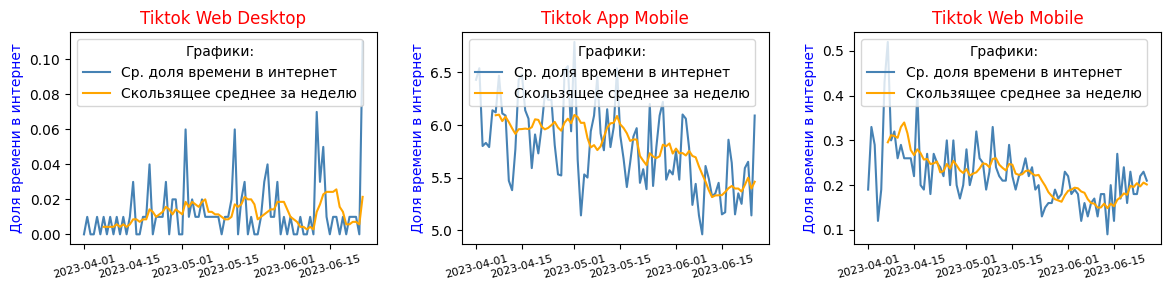

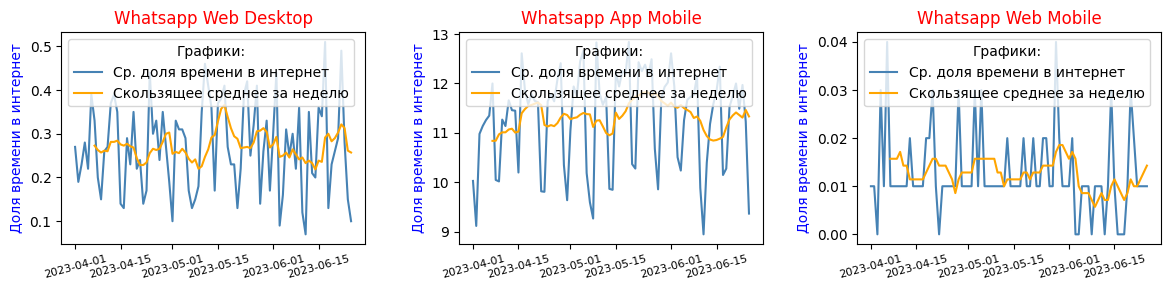

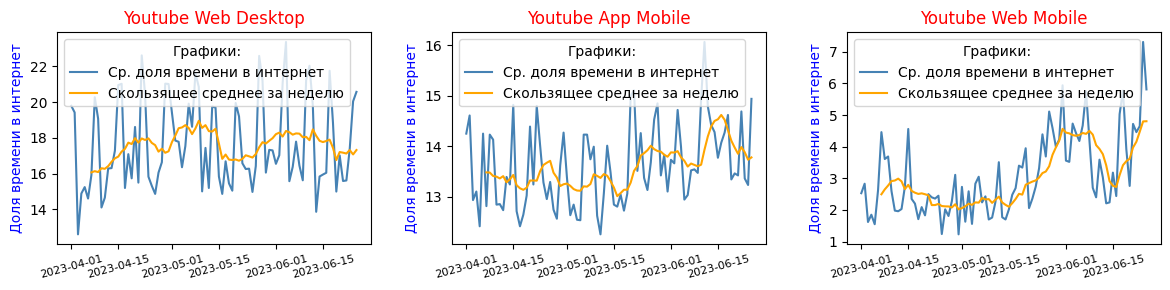

In [51]:
visual_stationarity_full(df_da_44, list_features)

**Отмечаем** возможные тренды:
* для *Yuotube Web Mobile* и *Youtube App Mobile*на возрастание.
* для *Tiktok App Mobile* и *Tiktok Web Mobile*на убывание.

**Тест `Дики-Фуллера` (Dickey-Fuller test)**.

Тест заключается в том, что нужно выполнить статистическую проверку следующей гипотезы:
* Нулевая гипотеза H0 предполагает, что процесс нестационарный.
* Альтернативная гипотеза H1, соответственно говорит об обратном. 

Используем пороговое значение, равное 0.05 (5%).

In [52]:
# Настроим, чтобы числа в датасетах отражались с 3 знаками после запятой
pd.set_option('display.float_format', '{:.3f}'.format) 

df_test_DF = pd.DataFrame(columns=[
    'source', 'ADF criterion', 'P-value', 'Critical value 1%',
    'Critical values 5%', 'Conclusion'])

# Запуск исполнения теста
test_DF(df_da_44, list_features)

# Просмотр датафрейма с результатами
display(df_test_DF) 

# Удалим ненужный более датафрейм
del df_test_DF

source  ADF criterion  P-value  Critical value 1%  \
0    Tiktok Web Desktop         -7.540    0.000             -3.510   
1     Tiktok App Mobile         -1.371    0.596             -3.516   
2     Tiktok Web Mobile         -2.354    0.155             -3.518   
3  Whatsapp Web Desktop         -6.486    0.000             -3.513   
4   Whatsapp App Mobile         -2.352    0.156             -3.516   
5   Whatsapp Web Mobile         -8.624    0.000             -3.510   
6   Youtube Web Desktop         -3.636    0.005             -3.522   
7    Youtube App Mobile         -1.955    0.307             -3.517   
8    Youtube Web Mobile         -0.648    0.860             -3.517   

   Critical values 5%       Conclusion  
0              -2.896     Стационарен.  
1              -2.899  НЕ стационарен!  
2              -2.900  НЕ стационарен!  
3              -2.897     Стационарен.  
4              -2.899  НЕ стационарен!  
5              -2.896     Стационарен.  
6              -2.901     Стационарен.  
7              -2.899  НЕ стационарен!  
8              -2.899  НЕ стационарен!

##### **Промежуточные выводы** для возрастной группы 'до 45 до 54 лет':
* Посетители в возрасте от 44 до 54 лет редко пользуются 'Whatsapp Web Mobile'.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.
* Тест Дики-Фуллера не опровергает гипотезу о нестационарности временного ряда(наличии устойчивого тренда) для следующих источников:
    * 'Tiktok App Mobile',
    * 'Tiktok Web Mobile',
    * 'Whatsapp App Mobile',
    * 'Youtube App Mobile',
    * 'Youtube Web Desktop'.

In [53]:
# Удалим более ненужный датафрейм.
del df_da_44

## 4.8. Анализ Average Daily Attention по возрастной категории 'от 55 лет'.

In [54]:
print("Размер полного датафрейма:", df_da.shape)

df_da_55 = df_da[df_da.age == 55]
if (df_da.shape[0] / 6 == df_da_55.shape[0]):
    print("Выделение части датафрейма проведено корректно.")
else:
    print("Произошла потеря данных!")
    
print("Размер датафрейма по возрастной категории 'от 24 до 24 лет':", 
      df_da_55.shape)
df_da_55.head(3)

Размер полного датафрейма: (516, 11)
Выделение части датафрейма проведено корректно.
Размер датафрейма по возрастной категории 'от 24 до 24 лет': (86, 11)


Date  Tiktok Web Desktop  Tiktok App Mobile  Tiktok Web Mobile  \
430 2023-04-01               0.020              5.070              0.410   
431 2023-04-02               0.020              4.860              0.440   
432 2023-04-03               0.010              4.100              0.540   

     Whatsapp Web Desktop  Whatsapp App Mobile  Whatsapp Web Mobile  \
430                 0.230               12.240                0.010   
431                 0.250               10.980                0.010   
432                 0.190               12.260                0.010   

     Youtube Web Desktop  Youtube App Mobile  Youtube Web Mobile  age  
430               16.940              18.220               7.660   55  
431               16.430              17.780               4.580   55  
432               13.250              16.490               6.030   55

### 4.8.1. Графическое представление Average Daily Attention по возрастной категории 'от 55 лет'.

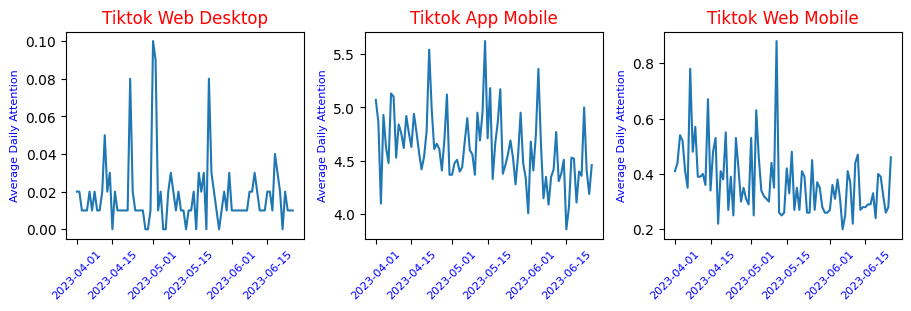

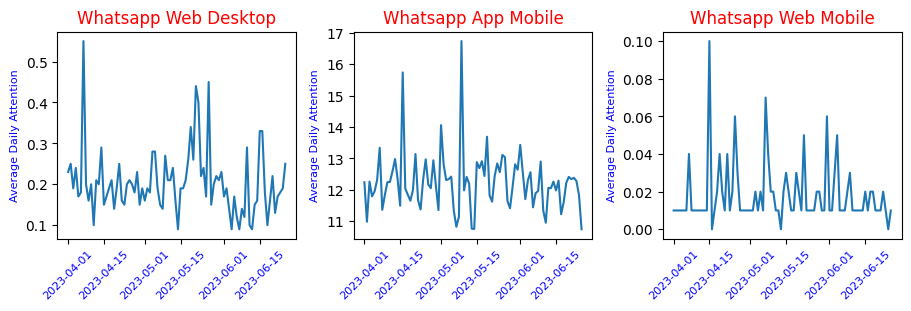

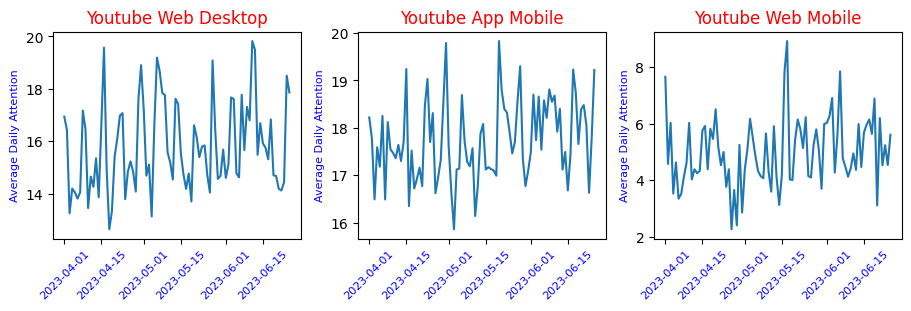

In [55]:
for source in range(0, len(list_features), 3):
    plot3_average_daily_duration(df_da_55, source) 

**Отмечаем**:
* возможны тенденции для следующих источников:
    * *Tiktik Web Mobile*,
    * *Youtube Web Desktop*,
    * *Youtube App Mobile*,.
* для остальных источников визуально определить тренды невозможно;
* посетители от 55 лет редко пользуются 'Whatsapp Web Mobile'.  

### 4.8.2. Анализ на наличие трендов и сезонности `Average Daily Duration` по возрастной категории 'от 55 лет'.

  0%|          | 0/9 [00:00<?, ?it/s]

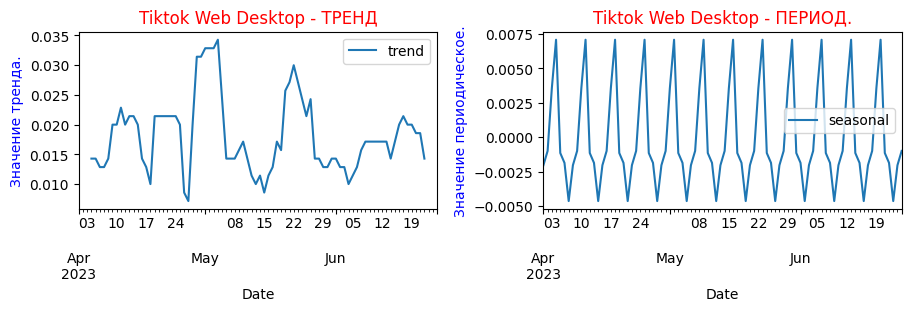

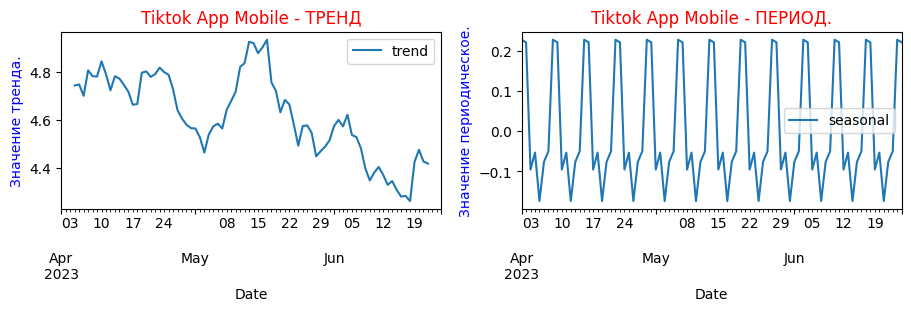

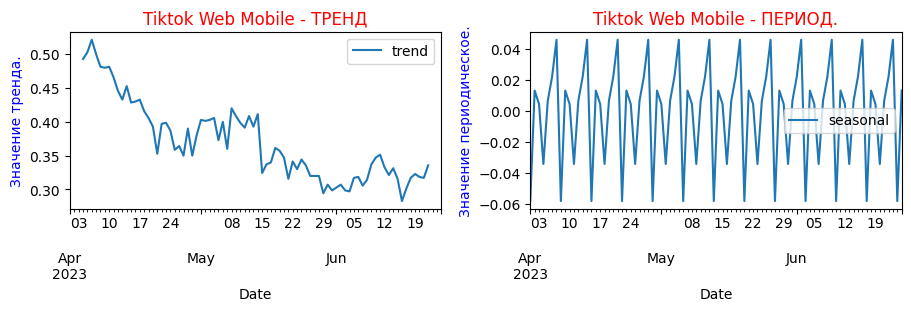

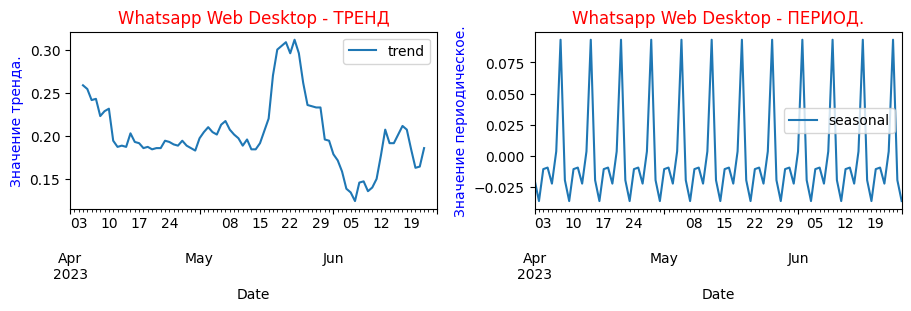

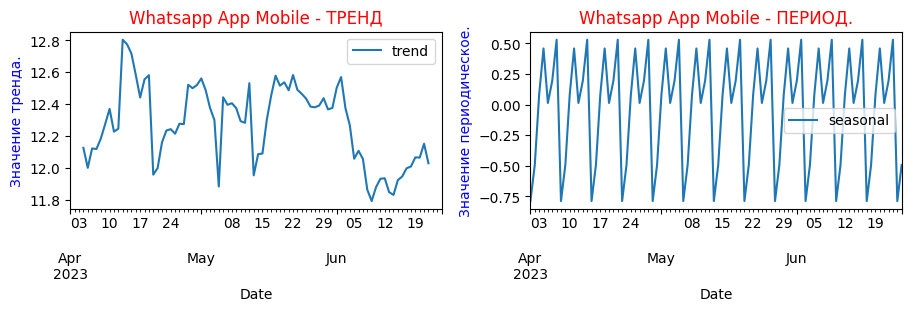

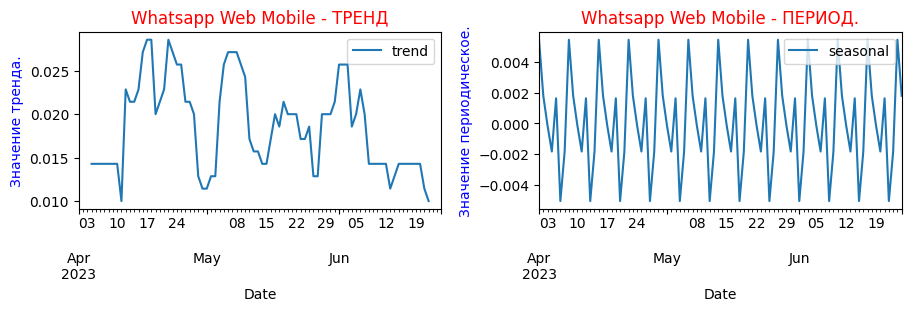

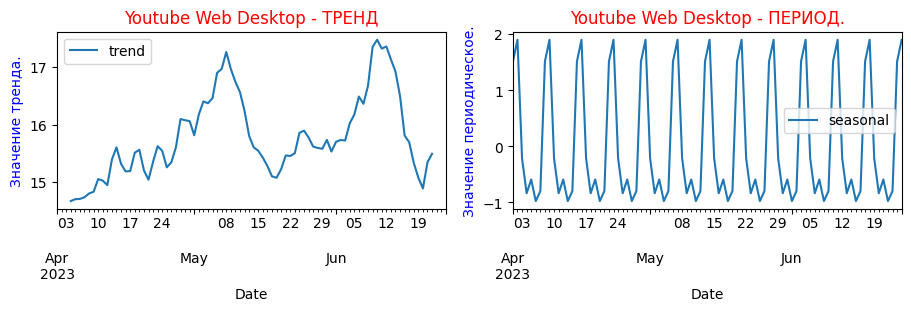

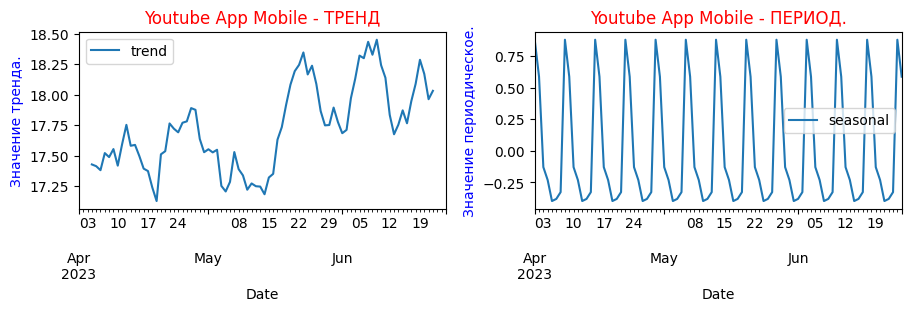

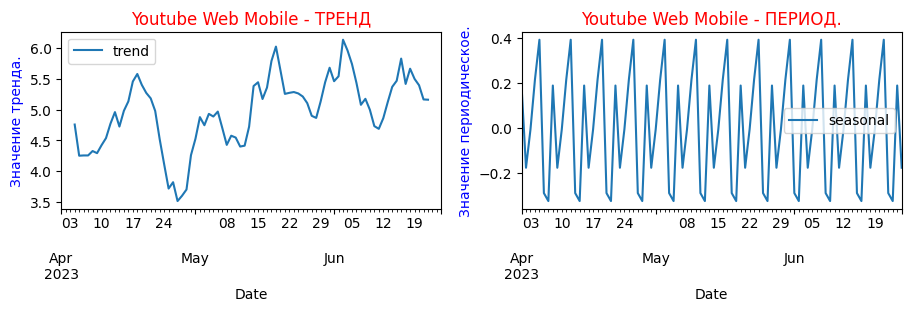

In [56]:
trend_seasonality(df_da_55, list_features)

**Отмечаем**, для возрастной группы 'от 55 лет':
* Возможные отрицательные тренды для *Tiktok App Mobile*, *Tiktok Web Mobile*,    
* Возможные положительные тренд для *Yuotube Web Mobile* и *Yuotube App Mobile*.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.

**Изучим сезонную (периодическую) составляющую за неделю.**

Дни недели:
23-04-01 - Sat           23-04-02 - Sun           23-04-03 - Mon           23-04-04 - Tue
23-04-05 - Wed           23-04-06 - Thu           23-04-07 - Fri           23-04-08 - Sat
23-04-09 - Sun           23-04-10 - Mon           23-04-11 - Tue           23-04-12 - Wed
23-04-13 - Thu           23-04-14 - Fri           23-04-15 - Sat           23-04-16 - Sun


  0%|          | 0/3 [00:00<?, ?it/s]

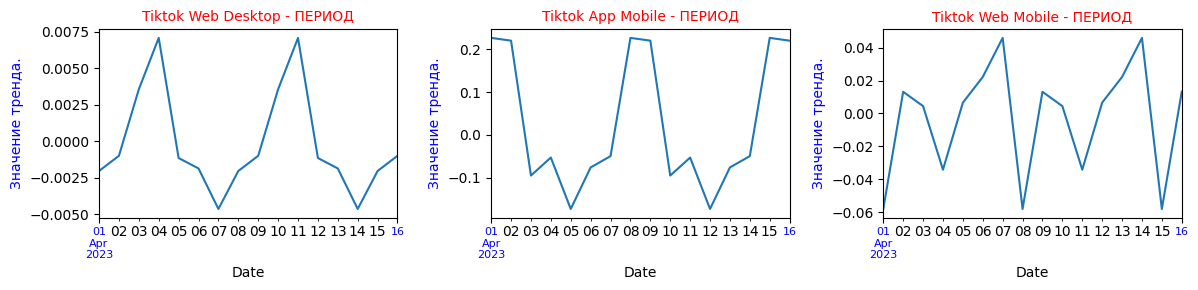

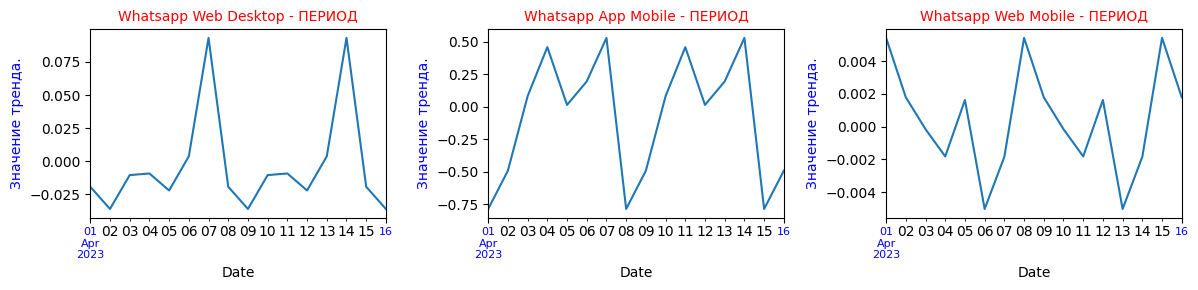

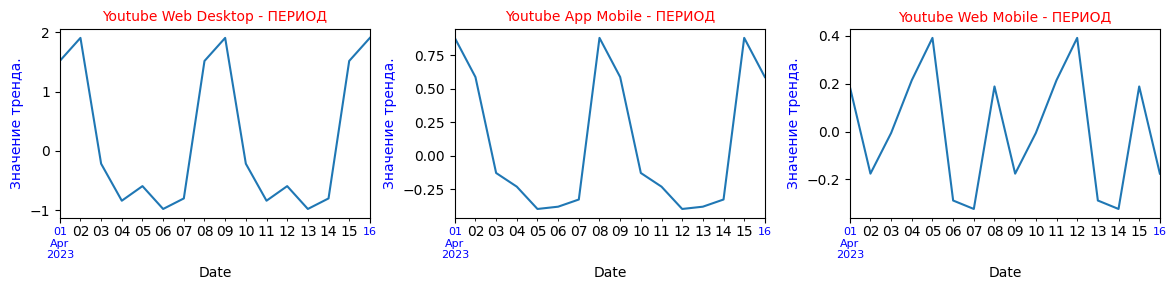

In [57]:
date_start, date_stop = '2023-04-01', '2023-04-16'

calc_print_weekday(date_start, date_stop) 
all_seasonal(df_da_55, list_features)

**Отмечаем**:
* Для всех источников наблюдается периодичность величиной - 1 неделя.
* Для трех источников информации ('Tiktok Web Desktop', 'Whatsapp Web Desktop', 'Whatsapp App Mobile') можно говорить о том, что проведенное на медиа объекте пользователями возрастной группы 'от 55 лет' уменьшается в выходные и резко возрастает в рабочие дни.
* Ещё для двух источников информации ('Youtube Web Desktop', 'Youtube App Mobile') наблюдаем противоположную картину, с максимумами в выходные дни и минимумами в рабочие дни.

**Оценку стационарности проведём 2 способами**:
* `визуально`,
* применив тест `Дики-Фуллера`.

  0%|          | 0/3 [00:00<?, ?it/s]

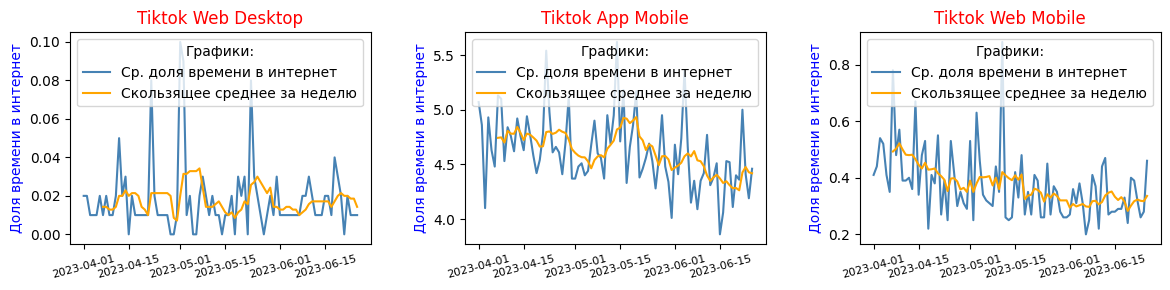

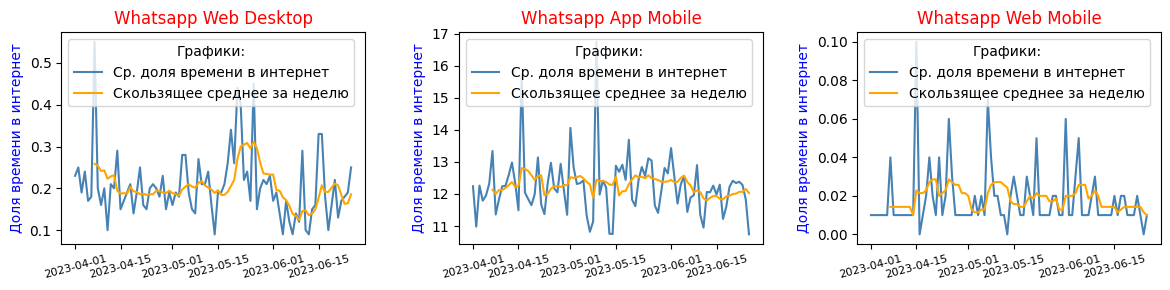

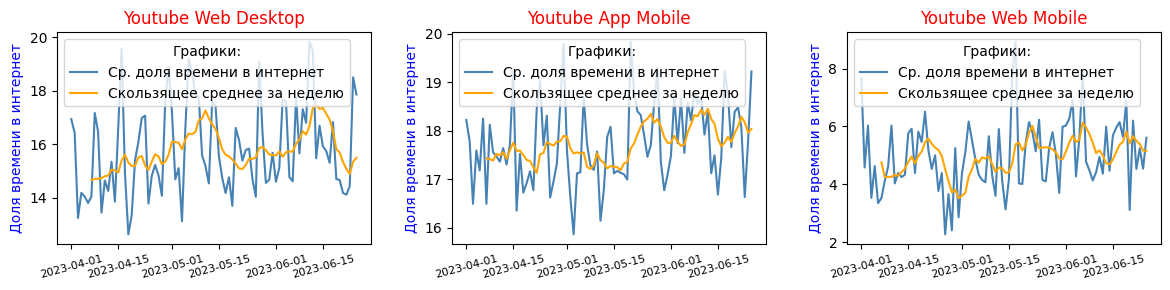

In [58]:
visual_stationarity_full(df_da_55, list_features)

**Отмечаем** возможные тренды:
* для *Yuotube Web Desktop* , *Youtube App Mobile* и  *Youtube Web Mobile* на возрастание;
* для *Tiktok App Mobile* и *Tiktok WEb Mobile*

**Тест `Дики-Фуллера` (Dickey-Fuller test)**.

Тест заключается в том, что нужно выполнить статистическую проверку следующей гипотезы:
* Нулевая гипотеза H0 предполагает, что процесс нестационарный.
* Альтернативная гипотеза H1, соответственно говорит об обратном. 

Используем пороговое значение, равное 0.05 (5%).

In [59]:
# Настроим, чтобы числа в датасетах отражались с 3 знаками после запятой
pd.set_option('display.float_format', '{:.3f}'.format) 

df_test_DF = pd.DataFrame(columns=[
    'source', 'ADF criterion', 'P-value', 'Critical value 1%',
    'Critical values 5%', 'Conclusion'])

# Запуск исполнения теста
test_DF(df_da_55, list_features)

# Просмотр датафрейма с результатами
display(df_test_DF) 

# Удалим ненужный более датафрейм
del df_test_DF

source  ADF criterion  P-value  Critical value 1%  \
0    Tiktok Web Desktop         -7.350    0.000             -3.510   
1     Tiktok App Mobile         -7.017    0.000             -3.510   
2     Tiktok Web Mobile         -2.612    0.091             -3.519   
3  Whatsapp Web Desktop         -7.389    0.000             -3.510   
4   Whatsapp App Mobile         -7.625    0.000             -3.511   
5   Whatsapp Web Mobile         -7.404    0.000             -3.511   
6   Youtube Web Desktop         -2.569    0.100             -3.523   
7    Youtube App Mobile         -5.986    0.000             -3.512   
8    Youtube Web Mobile         -7.885    0.000             -3.510   

   Critical values 5%       Conclusion  
0              -2.896     Стационарен.  
1              -2.896     Стационарен.  
2              -2.900  НЕ стационарен!  
3              -2.896     Стационарен.  
4              -2.897     Стационарен.  
5              -2.897     Стационарен.  
6              -2.902  НЕ стационарен!  
7              -2.897     Стационарен.  
8              -2.896     Стационарен.

**Промежуточные выводы** для возрастной группы 'от 55 лет':
* Посетители в возрасте от 55 лет редко пользуются 'Whatsapp Web Mobile'.
* Периодичность (или сезонность) присутствует для всех трёх источников. Длительность повторений - около недели.
* Тест Дики-Фуллера не опровергает гипотезу о нестационарности временного ряда(наличии устойчивого тренда) для следующих источников:
    * 'Tiktok Web Mobile',
    * 'Youtube Web Desktop'.

In [60]:
# Удалим более ненужный датафрейм.
del df_da_55

<hr style='border:2px solid #460073'> </hr>
<h1 style='color: #460073'>5. Итоговые выводы.</h1> 
<hr style='border:2px solid #460073'> </hr>

**По результатам исследования можно отметить следующие факты и сделать приводимые ниже выводы:**
    
1. Для проведения исследования получены данные, накопленные в период 2023-04-01 по 2023-06-25.
2. В файле `Daily_Attention` находятся примерно 516 записей и 77 признаков.  
3. Все данные разбиты на возрастные группы:
    * до 12 лет,
    * 12 - 24 года,
    * 25 - 34 года,
    * 35 - 44 года,
    * 45 - 54 года,
    * от 55 и старше.
4. Провёл первичную обработку данных.
5. В связи с большим количеством источников информации (25, создающих 75 признаков) аудитории диджитал-ресурсов среди населения России и с связи с демонстрационой целью данной работы, **ограничился ТРЕМЯ ресурсами**. Выбор сделаем по наиболее интересным источникам, с данными без пропусков, так как располагаю всего 86 записями по каждой возрастной группе.  Остальные признаки удалил. 
6. Согласно задания на проект:
    * провёл EDA анализ;
    * **для различных возрастных групп**:
        * суммарно по всем возрастным группам,
        * группа до 12 лет,
        * группа от 12 до 24 лет,
        * группа от 24 до 34 лет,
        * группа от 34 до 44 лет,
        * группа от 44 до 54 лет,
        * группа свыше 55 лет.    
    изучил наличие трендов и периодичности как визуально, так и применяя метод **Дики-Фуллера (Dickey-Fuller test)** для оценки стационарности временных рядов.
7. Отметил следующие закономерности, характерные для всех возрастных категорий:
* Посетители всех возрастов редко пользуются 'Whatsapp Web Mobile'.
* Периодичность (или сезонность) присутствует для всех источников данных. Длительность повторений - около недели.
* Для 5 из 6 всех источников информации *Тест Дики-Фуллера* не опровергает гипотезу о нестационарности временного ряда(наличии устойчивого тренда):
    * 'Whatsapp App Mobile',
    * 'Tiktok App Mobile',
    * 'Youtube Web Desktop'.